In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [ ]:
!pip install xarray netCDF4 matplotlib tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.1 MB/s eta 0:00:00


In [ ]:
import xarray as xr

file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"

ds = xr.open_dataset(file_path)

print(" DATASET SUMMARY ")
print(ds)


 DATASET SUMMARY 
<xarray.Dataset> Size: 4GB
Dimensions:     (valid_time: 350640, latitude: 21, longitude: 33)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 3MB 1984-11-01 ... 2024-10-31T23:...
  * latitude    (latitude) float64 168B 23.0 22.5 22.0 21.5 ... 14.0 13.5 13.0
  * longitude   (longitude) float64 264B 79.0 79.5 80.0 80.5 ... 94.0 94.5 95.0
    number      int64 8B ...
    expver      (valid_time) <U4 6MB ...
Data variables:
    mwd         (valid_time, latitude, longitude) float32 972MB ...
    swh         (valid_time, latitude, longitude) float32 972MB ...
    pp1d        (valid_time, latitude, longitude) float32 972MB ...
    wdw         (valid_time, latitude, longitude) float32 972MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    h

In [ ]:
import xarray as xr

file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"  # your correct path
ds = xr.open_dataset(file_path)

swh = ds['swh']
print(swh)
print("Shape (time, lat, lon):", swh.shape)


<xarray.DataArray 'swh' (valid_time: 350640, latitude: 21, longitude: 33)> Size: 972MB
[242993520 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 3MB 1984-11-01 ... 2024-10-31T23:...
  * latitude    (latitude) float64 168B 23.0 22.5 22.0 21.5 ... 14.0 13.5 13.0
  * longitude   (longitude) float64 264B 79.0 79.5 80.0 80.5 ... 94.0 94.5 95.0
    number      int64 8B ...
    expver      (valid_time) <U4 6MB ...
Attributes: (12/32)
    GRIB_paramId:                             140229
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      693
    GRIB_typeOfLevel:                         meanSea
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Significant height of combined .

In [ ]:
lats = ds['latitude'].values
lons = ds['longitude'].values

print("Latitudes:", lats)
print("Longitudes:", lons)
print("Number of lats:", len(lats))
print("Number of lons:", len(lons))


Latitudes: [23.  22.5 22.  21.5 21.  20.5 20.  19.5 19.  18.5 18.  17.5 17.  16.5
 16.  15.5 15.  14.5 14.  13.5 13. ]
Longitudes: [79.  79.5 80.  80.5 81.  81.5 82.  82.5 83.  83.5 84.  84.5 85.  85.5
 86.  86.5 87.  87.5 88.  88.5 89.  89.5 90.  90.5 91.  91.5 92.  92.5
 93.  93.5 94.  94.5 95. ]
Number of lats: 21
Number of lons: 33


In [ ]:
import numpy as np

lats = ds['latitude'].values
lons = ds['longitude'].values

points = [
    {"name": "TopLeft",     "lat_idx": 2,  "lon_idx": 2},
    {"name": "TopRight",    "lat_idx": 2,  "lon_idx": len(lons) - 3},
    {"name": "Center",      "lat_idx": len(lats)//2, "lon_idx": len(lons)//2},
    {"name": "BottomLeft",  "lat_idx": len(lats) - 3, "lon_idx": 2},
    {"name": "BottomRight", "lat_idx": len(lats) - 3, "lon_idx": len(lons) - 3},
]

for p in points:
    p["lat"] = float(lats[p["lat_idx"]])
    p["lon"] = float(lons[p["lon_idx"]])

points


[{'name': 'TopLeft', 'lat_idx': 2, 'lon_idx': 2, 'lat': 22.0, 'lon': 80.0},
 {'name': 'TopRight', 'lat_idx': 2, 'lon_idx': 30, 'lat': 22.0, 'lon': 94.0},
 {'name': 'Center', 'lat_idx': 10, 'lon_idx': 16, 'lat': 18.0, 'lon': 87.0},
 {'name': 'BottomLeft', 'lat_idx': 18, 'lon_idx': 2, 'lat': 14.0, 'lon': 80.0},
 {'name': 'BottomRight',
  'lat_idx': 18,
  'lon_idx': 30,
  'lat': 14.0,
  'lon': 94.0}]

In [ ]:
time = ds['valid_time']

point_series = {}

for p in points:
    name = p["name"]
    lat_idx = p["lat_idx"]
    lon_idx = p["lon_idx"]

    # select that grid cell for all times
    ts = swh.isel(latitude=lat_idx, longitude=lon_idx)

    point_series[name] = ts

    print(f"{name} at lat={p['lat']}, lon={p['lon']}")
    print(ts)
    print("-" * 40)


TopLeft at lat=22.0, lon=80.0
<xarray.DataArray 'swh' (valid_time: 350640)> Size: 1MB
[350640 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 3MB 1984-11-01 ... 2024-10-31T23:...
    number      int64 8B ...
    latitude    float64 8B 22.0
    longitude   float64 8B 80.0
    expver      (valid_time) <U4 6MB ...
Attributes: (12/32)
    GRIB_paramId:                             140229
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      693
    GRIB_typeOfLevel:                         meanSea
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Significant height of combined ...
    units:                                    m
    standard_name:                            un

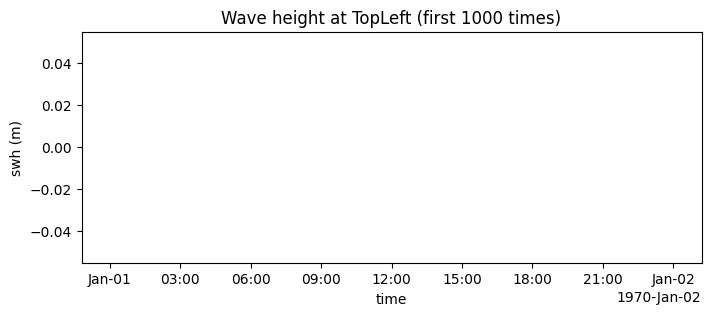

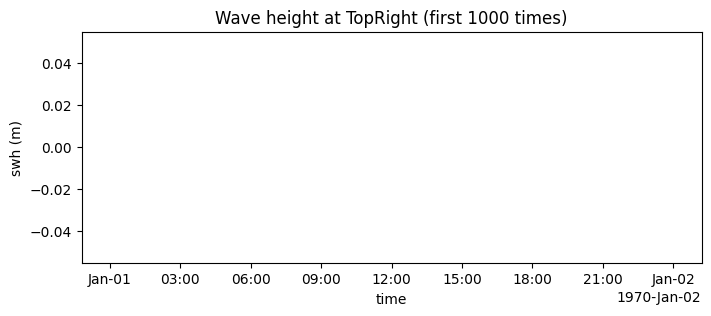

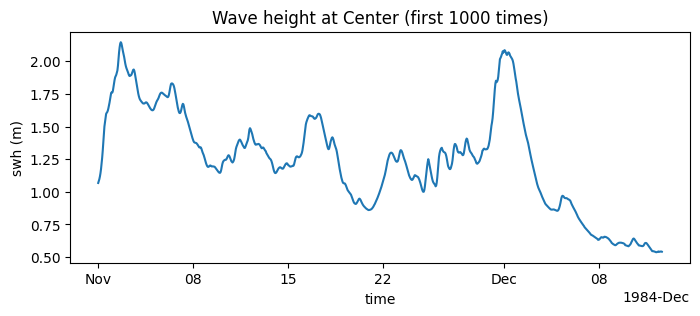

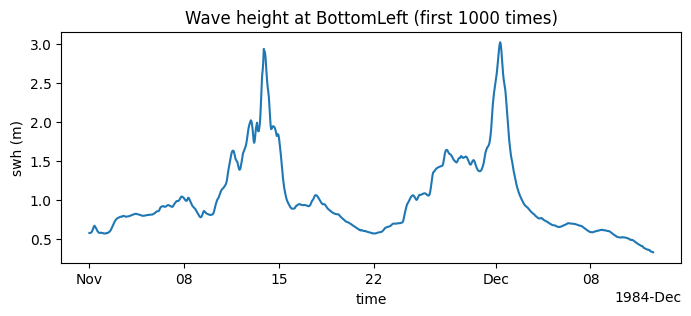

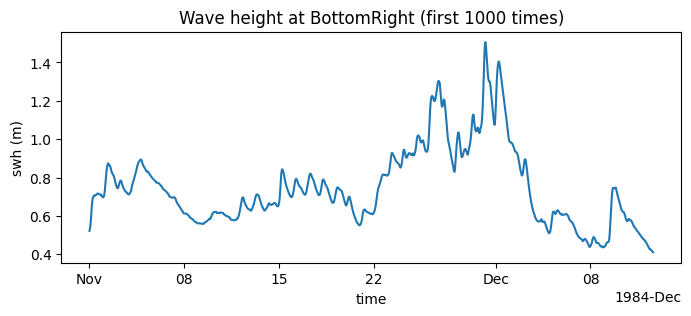

In [ ]:
import matplotlib.pyplot as plt

# Example: plot first 1000 time steps for each point
n_plot = 1000

for name, ts in point_series.items():
    plt.figure(figsize=(8, 3))
    ts[:n_plot].plot()
    plt.title(f"Wave height at {name} (first {n_plot} times)")
    plt.ylabel("swh (m)")
    plt.xlabel("time")
    plt.show()


In [ ]:
swh_2010 = swh.sel(valid_time="2010")


In [ ]:
jfm = swh_2010.sel(valid_time=slice("2010-01-01", "2010-03-31")).mean(dim="valid_time")
amj = swh_2010.sel(valid_time=slice("2010-04-01", "2010-06-30")).mean(dim="valid_time")
jas = swh_2010.sel(valid_time=slice("2010-07-01", "2010-09-30")).mean(dim="valid_time")
ond = swh_2010.sel(valid_time=slice("2010-10-01", "2010-12-31")).mean(dim="valid_time")


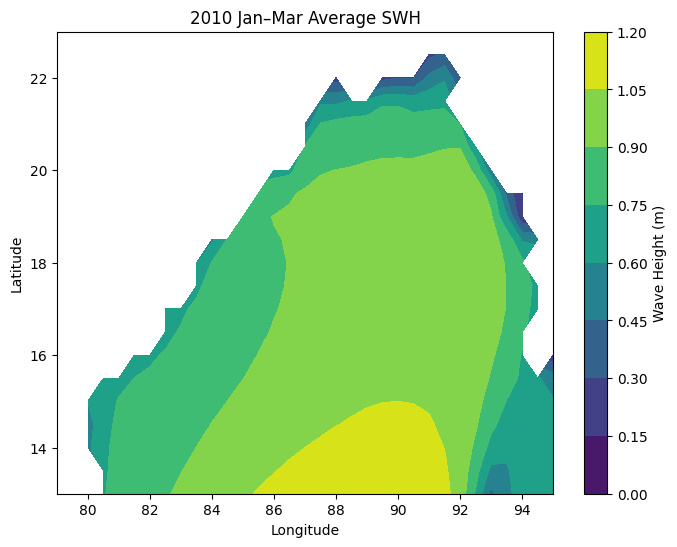

In [ ]:
plt.figure(figsize=(8,6))
plt.contourf(lons, lats, jfm, cmap='viridis')
plt.title("2010 Jan–Mar Average SWH")
plt.colorbar(label="Wave Height (m)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


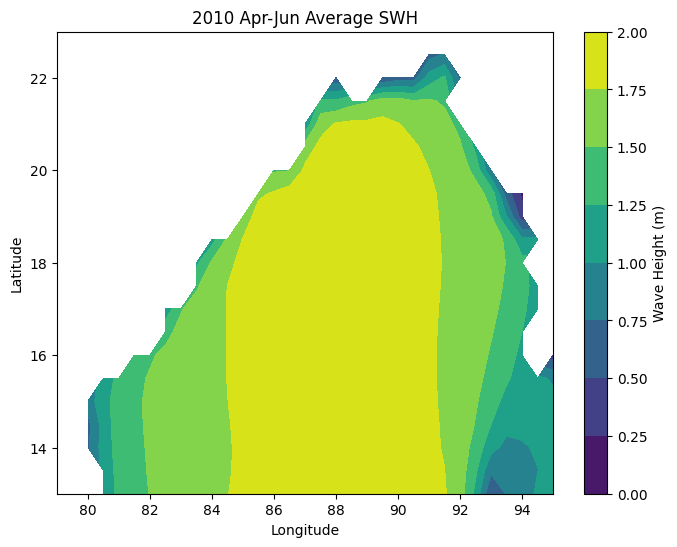

In [ ]:
plt.figure(figsize=(8,6))
plt.contourf(lons, lats, amj, cmap='viridis')
plt.title("2010 Apr-Jun Average SWH")
plt.colorbar(label="Wave Height (m)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


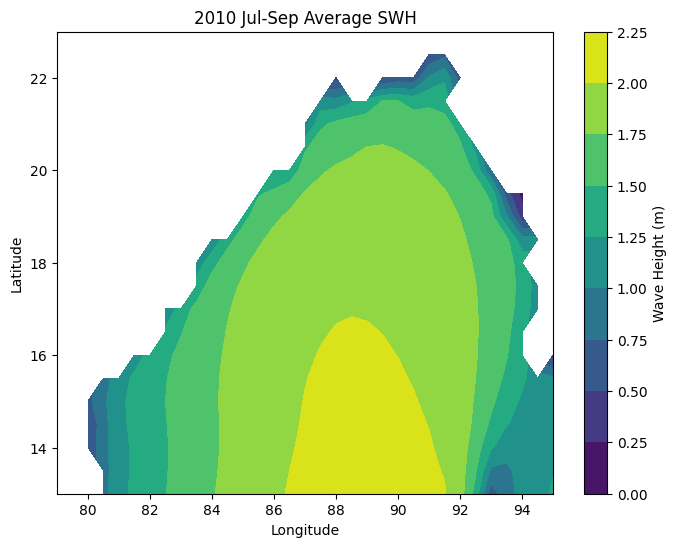

In [ ]:
plt.figure(figsize=(8,6))
plt.contourf(lons, lats, jas, cmap='viridis')
plt.title("2010 Jul-Sep Average SWH")
plt.colorbar(label="Wave Height (m)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

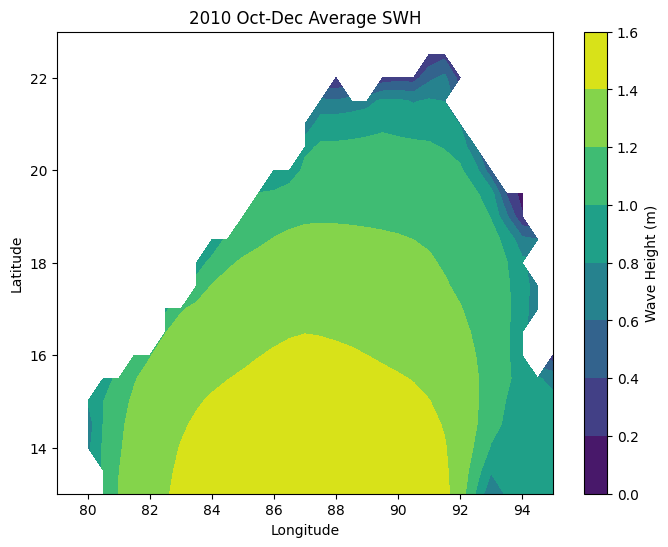

In [ ]:
plt.figure(figsize=(8,6))
plt.contourf(lons, lats, ond, cmap='viridis')
plt.title("2010 Oct-Dec Average SWH")
plt.colorbar(label="Wave Height (m)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



------ YEAR 2010 ------


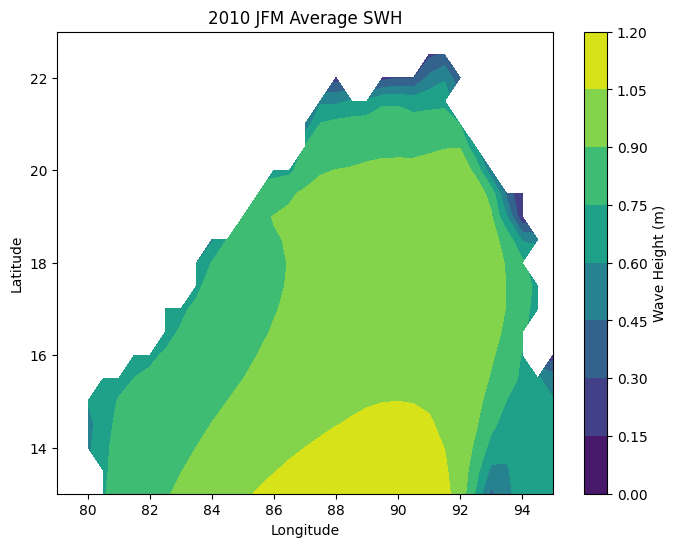

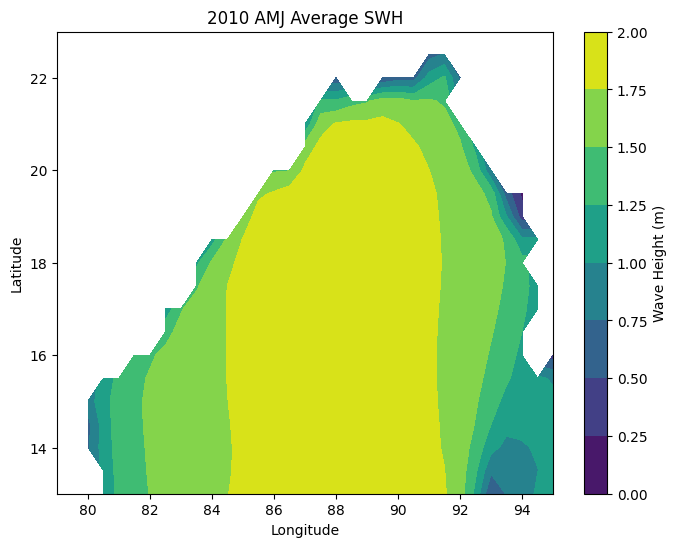

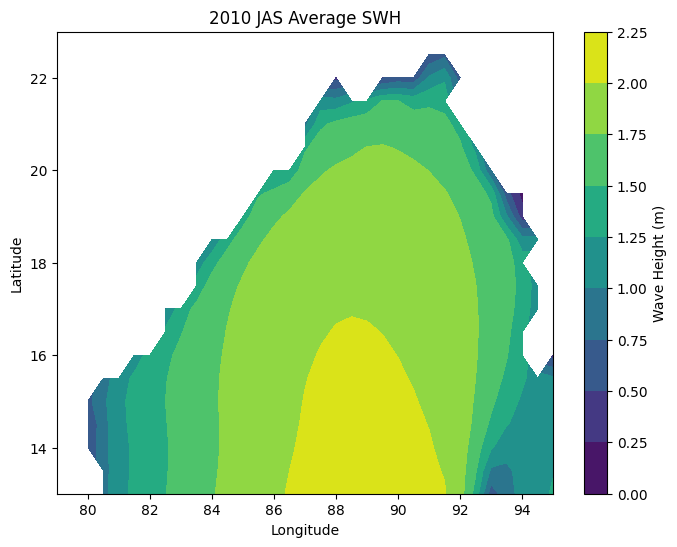

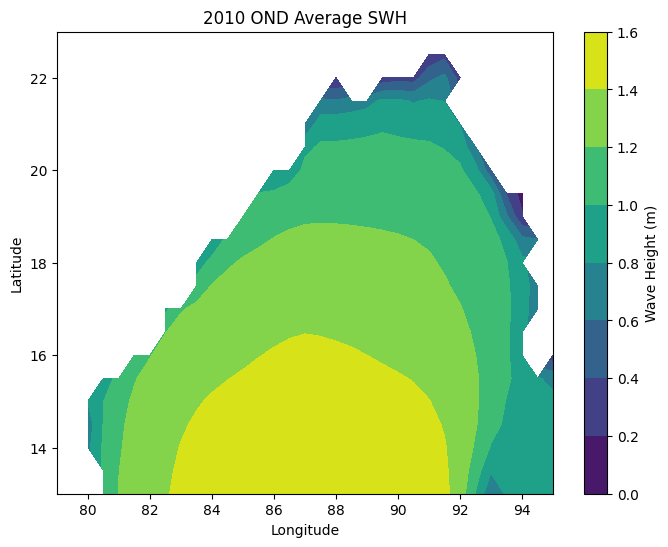



------ YEAR 2011 ------


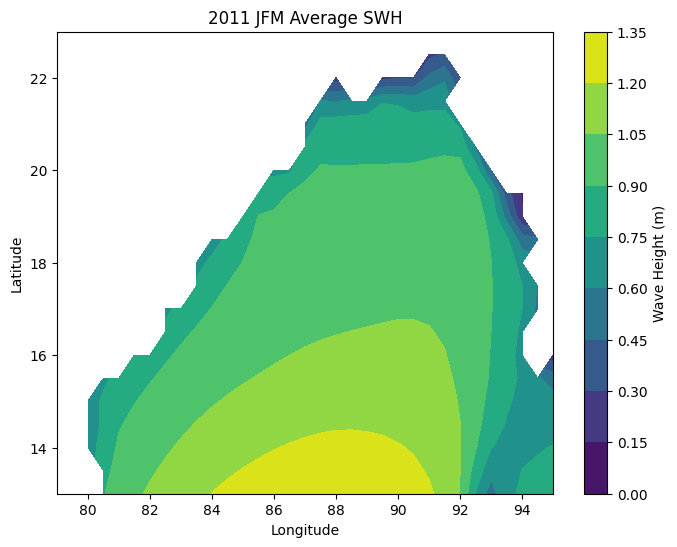

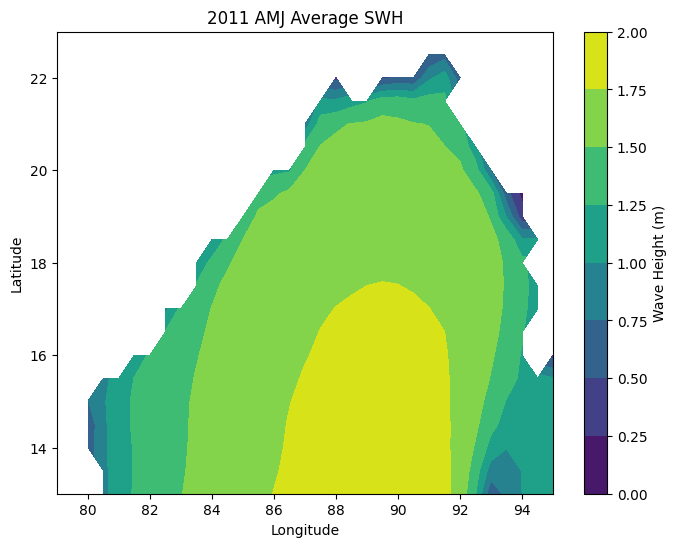

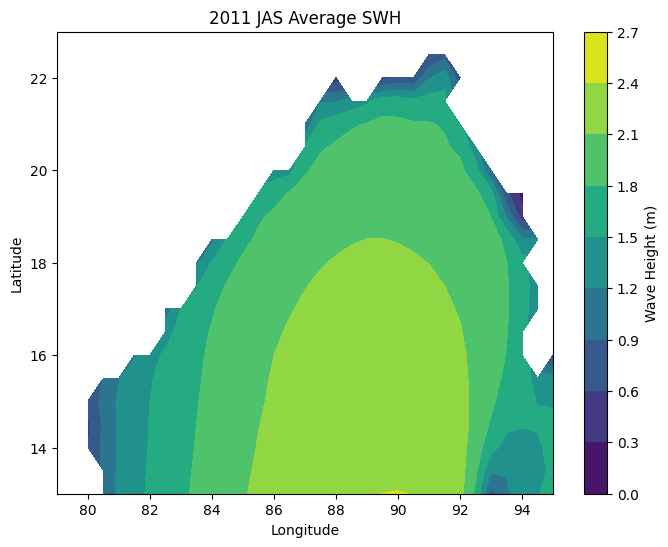

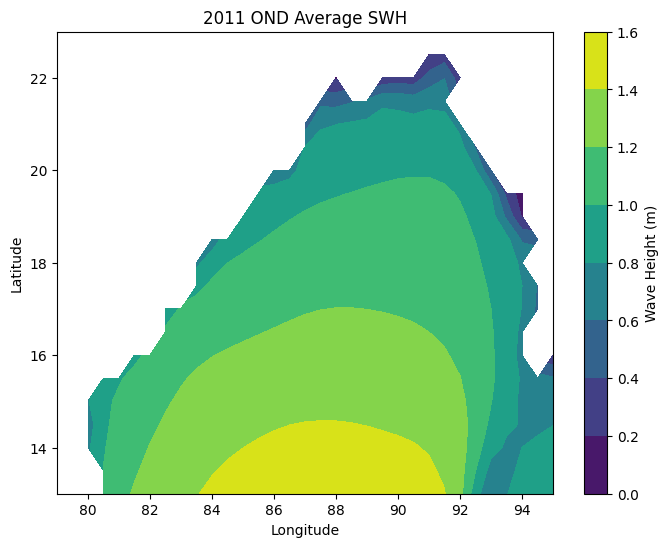



------ YEAR 2012 ------


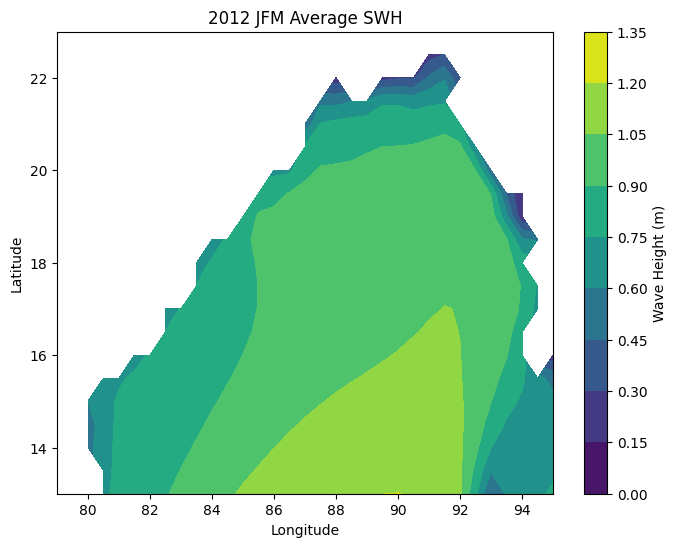

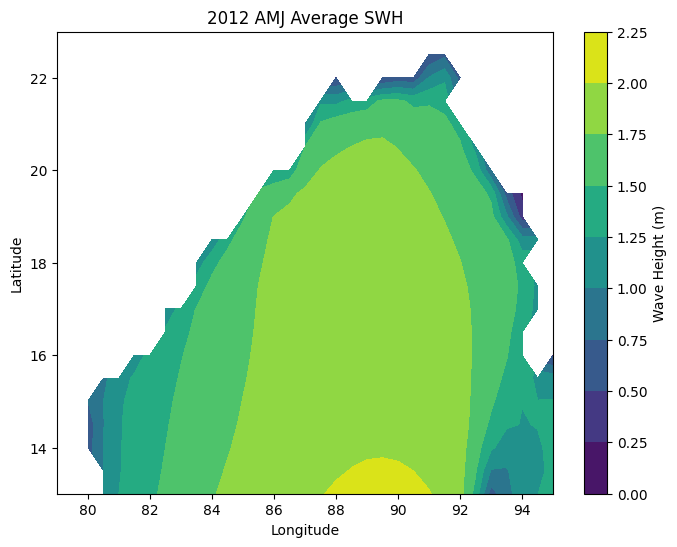

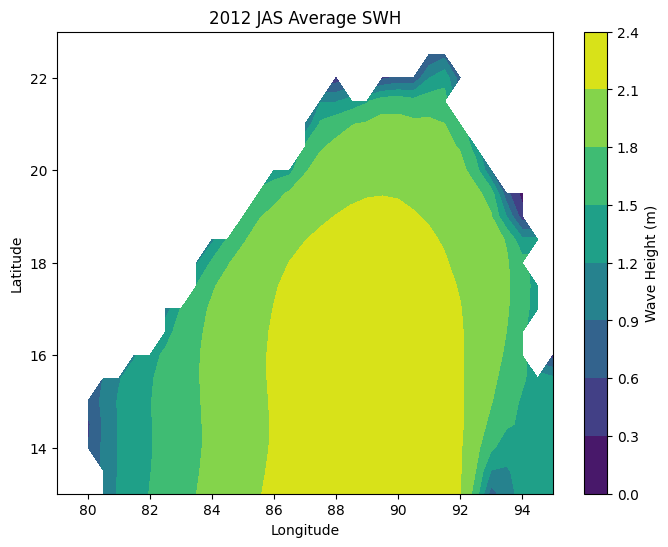

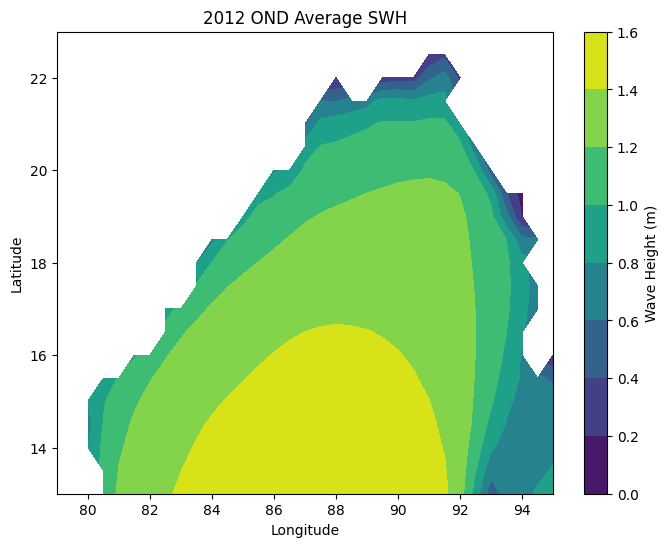



------ YEAR 2013 ------


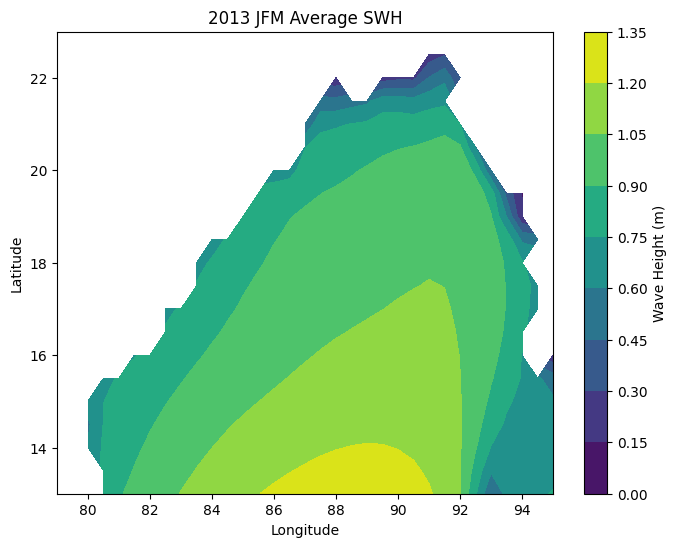

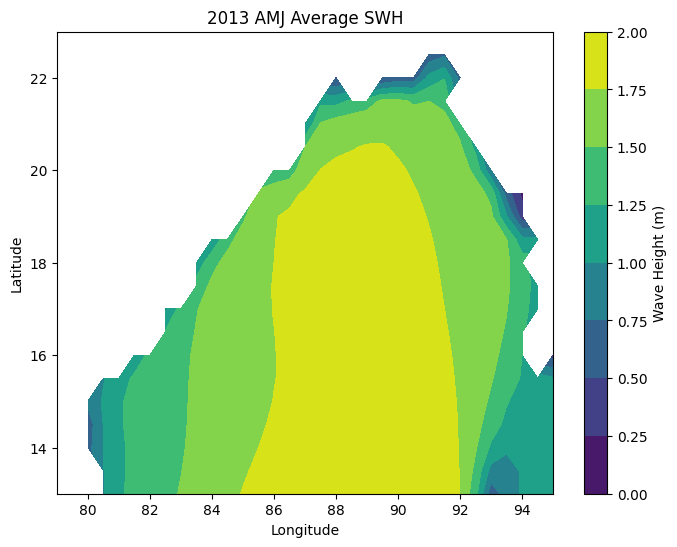

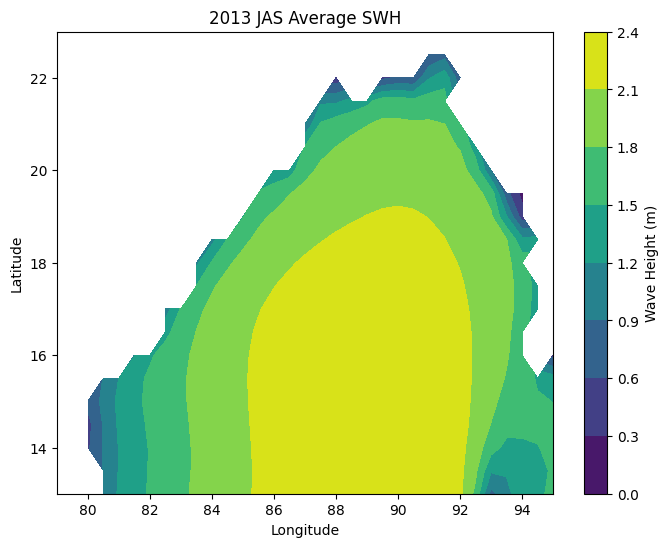

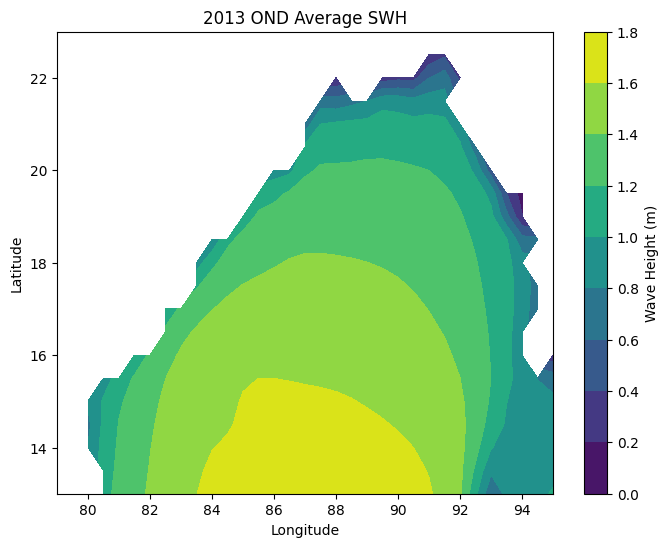



------ YEAR 2014 ------


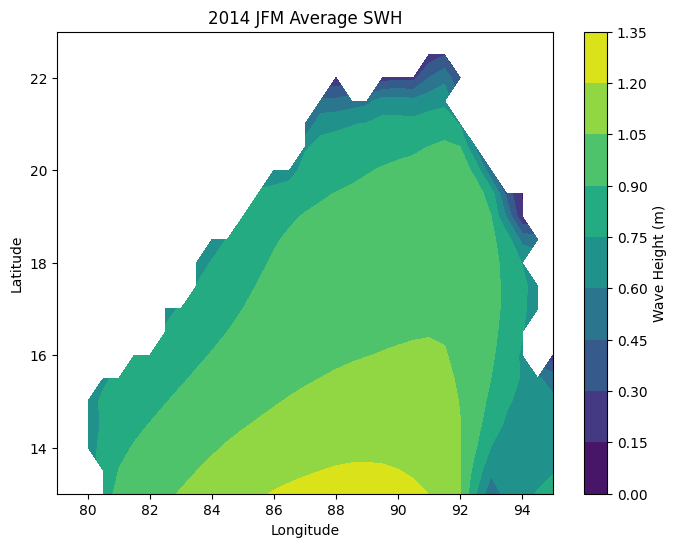

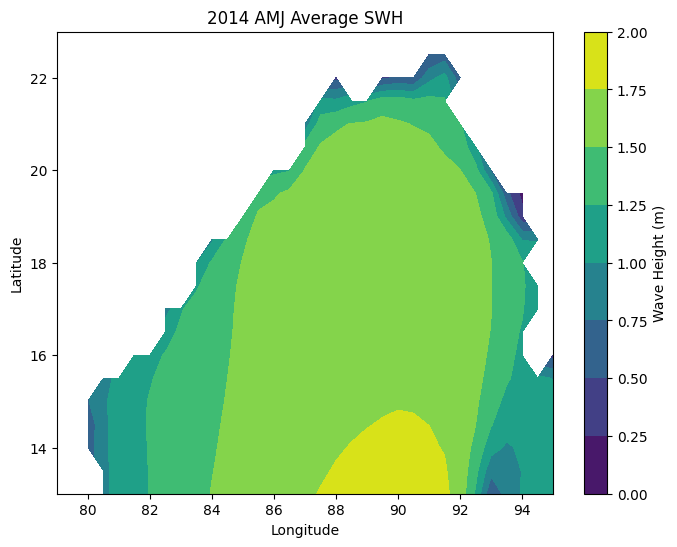

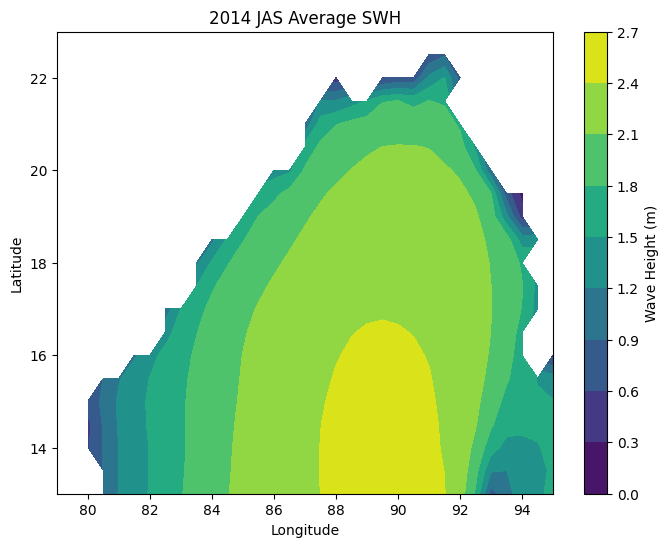

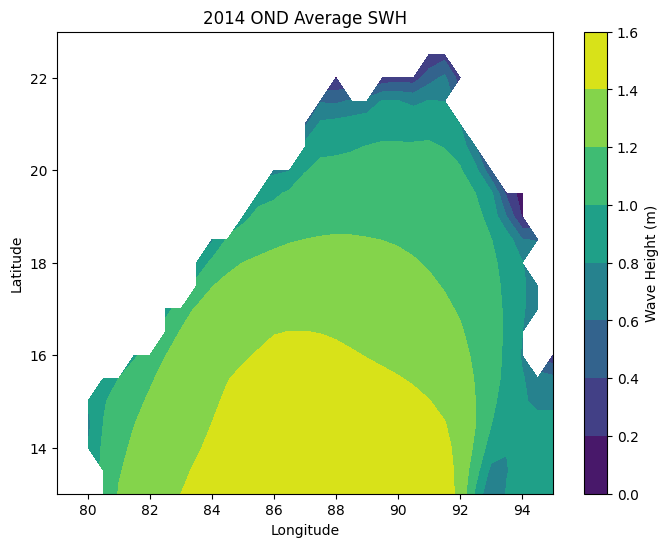

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years = [2010, 2011, 2012, 2013, 2014]

# Define seasons with start–end dates
seasons = {
    "JFM": ("01-01", "03-31"),
    "AMJ": ("04-01", "06-30"),
    "JAS": ("07-01", "09-30"),
    "OND": ("10-01", "12-31")
}

for year in years:
    print(f"\n\n------ YEAR {year} ------")
    swh_year = swh.sel(valid_time=str(year))

    for season_name, (start, end) in seasons.items():
        # Slice the time range
        ds_season = swh_year.sel(valid_time=slice(f"{year}-{start}", f"{year}-{end}"))

        # Seasonal average
        season_avg = ds_season.mean(dim="valid_time")

        # Plot contour map
        plt.figure(figsize=(8,6))
        plt.contourf(lons, lats, season_avg, cmap="viridis")
        plt.title(f"{year} {season_name} Average SWH")
        plt.colorbar(label="Wave Height (m)")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()


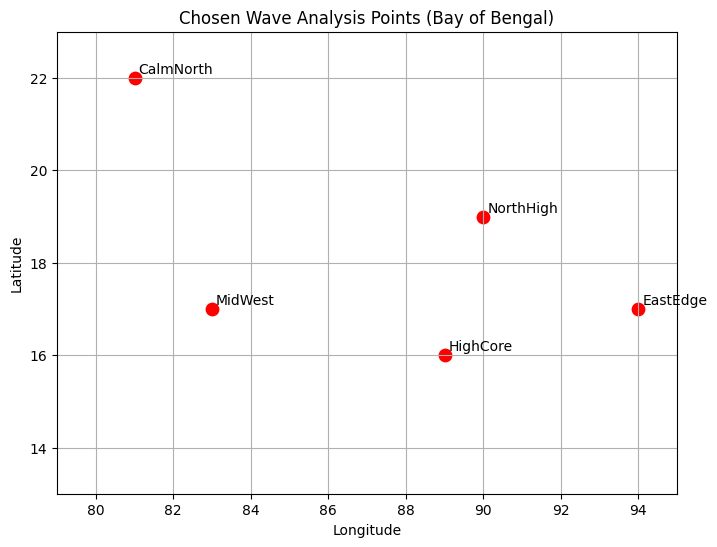

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

# Load dataset (use your correct path)
ds = xr.open_dataset("/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc")

lats = ds['latitude'].values
lons = ds['longitude'].values

# Selected points (lat, lon)
points = [
    {"name": "HighCore",   "lat": 16.0, "lon": 89.0},   # Strongest waves
    {"name": "NorthHigh",  "lat": 19.0, "lon": 90.0},   # Seasonal shift area
    {"name": "EastEdge",   "lat": 17.0, "lon": 94.0},   # Sharp fall in waves
    {"name": "CalmNorth",  "lat": 22.0, "lon": 81.0},   # Always calm
    {"name": "MidWest",    "lat": 17.0, "lon": 83.0},   # Medium waves
]

# Plot the points on a blank coordinate map
plt.figure(figsize=(8, 6))
plt.title("Chosen Wave Analysis Points (Bay of Bengal)")

plt.scatter([], [])
plt.xlim(min(lons), max(lons))
plt.ylim(min(lats), max(lats))
plt.xlabel("Longitude")
plt.ylabel("Latitude")

for p in points:
    plt.scatter(p["lon"], p["lat"], color="red", s=80)
    plt.text(p["lon"] + 0.1, p["lat"] + 0.1, p["name"], fontsize=10)

plt.grid(True)
plt.show()


In [ ]:
# Run after restarting runtime
import numpy as np
import xarray as xr

# load dataset (change path if needed)
ds = xr.open_dataset("/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc")
swh = ds["swh"]
time = ds["valid_time"]

def month_bounds_fast(swh, time, month, max_time_samples=1000, lat_step=2, lon_step=2, seed=0):
    # indices of all time steps for this month
    time_idx = np.where(time.dt.month.values == month)[0]
    if time_idx.size == 0:
        return None

    # choose a subset of time indices (random but reproducible)
    rng = np.random.default_rng(seed)
    if time_idx.size > max_time_samples:
        sel_idx = rng.choice(time_idx, size=max_time_samples, replace=False)
    else:
        sel_idx = time_idx
    sel_idx = np.sort(sel_idx)

    # subsample in space as well
    sub = swh.isel(valid_time=sel_idx, latitude=slice(0, None, lat_step), longitude=slice(0, None, lon_step))

    # extract values and drop NaNs
    vals = sub.values.ravel()
    vals = vals[np.isfinite(vals)]
    if vals.size == 0:
        return None

    p1, p99 = np.percentile(vals, [1, 99])
    return float(p1), float(p99)

month_clip_bounds = {}
for m in range(1,13):
    bounds = month_bounds_fast(swh, time, m, max_time_samples=1000, lat_step=2, lon_step=2, seed=42)
    if bounds:
        month_clip_bounds[m] = bounds
        print(f"Month {m:02d}: {bounds[0]:.3f} - {bounds[1]:.3f} m")
    else:
        print(f"Month {m:02d}: no data or all NaN")


Month 01: 0.140 - 1.810 m
Month 02: 0.162 - 1.664 m
Month 03: 0.205 - 1.700 m


In [ ]:
# ----- 3. estimate safe fixed range for JANUARY (month=1) -----
month = 1
print("Estimating January percentiles (fast subsample)...")

p1, p99 = month_bounds_fast(swh, time, month, max_time_samples=1200, lat_step=2, lon_step=2, seed=42)
if p1 is None:
    raise RuntimeError("No data found for January in dataset.")

jan_vmin = 0
jan_vmax = 3

base_dir = "/content/drive/MyDrive/Wave_Monthly_Plots"
jan_dir = os.path.join(base_dir, "Jan_fixed")
os.makedirs(jan_dir, exist_ok=True)

levels = np.linspace(jan_vmin, jan_vmax, 20)
ticks = np.linspace(jan_vmin, jan_vmax, 5)
tick_labels = [f"{t:.3f}" for t in ticks]

for year in years:
    mask = (time.dt.year == year) & (time.dt.month == 1)
    swh_mon = swh.where(mask, drop=True)
    if swh_mon.size == 0:
        continue

    month_median = swh_mon.clip(jan_vmin, jan_vmax).median(dim="valid_time")

    fig, ax = plt.subplots(figsize=(6,5))
    cs = ax.contourf(lons, lats, month_median, levels=levels, cmap="Reds", extend='both')

    cbar = fig.colorbar(cs, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_ticks(ticks)
    cbar.set_ticklabels(tick_labels)
    cbar.ax.set_ylim(jan_vmin, jan_vmax)
    cbar.set_label("Significant Wave Height (m)")

    ax.set_title(f"Jan {year} - Median SWH (0–3 m)")
    fig.savefig(os.path.join(jan_dir, f"Jan_{year}.png"), dpi=150)
    plt.close(fig); gc.collect()


Estimating January percentiles (fast subsample)...


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os, gc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# ----- 1. load dataset -----
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

print("Loaded dataset. swh shape:", swh.shape)

# ----- 2. fast function to estimate 1% and 99% percentiles for a month -----
def month_bounds_fast(swh, time, month, max_time_samples=1000, lat_step=2, lon_step=2, seed=42):

    all_time_idx = np.where(time.dt.month.values == month)[0]
    if all_time_idx.size == 0:
        return None

    rng = np.random.default_rng(seed)
    sel_idx = rng.choice(
        all_time_idx,
        size=min(len(all_time_idx), max_time_samples),
        replace=False
    )
    sel_idx = np.sort(sel_idx)

    sub = swh.isel(
        valid_time=sel_idx,
        latitude=slice(0, None, lat_step),
        longitude=slice(0, None, lon_step)
    )

    vals = sub.values.ravel()
    vals = vals[np.isfinite(vals)]

    if vals.size == 0:
        return None

    p1, p99 = np.percentile(vals, [1, 99])
    return float(p1), float(p99)

# ----- 3. FEBRUARY SETTINGS -----
month = 2   # February
print("Estimating February percentiles (fast subsample)...")

p1, p99 = month_bounds_fast(
    swh, time, month,
    max_time_samples=1200,
    lat_step=2,
    lon_step=2,
    seed=42
)

if p1 is None:
    raise RuntimeError("No data found for February in dataset.")

# FIXED RANGE (same idea as your May code)
feb_vmin = 0
feb_vmax = 3.5   # calm winter month

print(
    f"February range fixed to: {feb_vmin} – {feb_vmax} m "
    f"(p99≈{p99:.2f} m)"
)

# ----- 4. create output folder -----
base_dir = "/content/drive/MyDrive/Wave_Monthly_Plots"
feb_dir = os.path.join(base_dir, "Feb_fixed")
os.makedirs(feb_dir, exist_ok=True)

# ----- 5. plotting setup -----
years = np.arange(1985, 2025)

def safe_close():
    plt.close('all')
    gc.collect()

# FIXED levels & ticks (same for all years)
levels = np.linspace(feb_vmin, feb_vmax, 20)
ticks = np.linspace(feb_vmin, feb_vmax, 5)
tick_labels = [f"{t:.3f}" for t in ticks]

# ----- 6. loop through years -----
for year in years:
    mask = (time.dt.year == year) & (time.dt.month == 2)
    swh_feb = swh.where(mask, drop=True)

    if swh_feb.size == 0:
        print(f"Feb {year}: no data, skipping.")
        continue

    # clip and take median
    swh_clipped = swh_feb.clip(min=feb_vmin, max=feb_vmax)
    month_median = swh_clipped.median(dim="valid_time")

    fig, ax = plt.subplots(figsize=(6,5))

    cs = ax.contourf(
        lons,
        lats,
        month_median,
        levels=levels,
        cmap="Reds",
        extend="both"
    )

    cbar = fig.colorbar(
        cs,
        ax=ax,
        orientation="vertical",
        fraction=0.046,
        pad=0.04
    )

    cbar.set_ticks(ticks)
    cbar.set_ticklabels(tick_labels)
    cbar.ax.set_ylim(feb_vmin, feb_vmax)
    cbar.set_label("Significant Wave Height (m)")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(f"Feb {year} - Median SWH ({feb_vmin}-{feb_vmax} m)")

    plt.tight_layout()
    save_path = os.path.join(feb_dir, f"Feb_{year}.png")
    fig.savefig(save_path, dpi=150)
    plt.close(fig)
    safe_close()

    print(f"Saved Feb {year} -> {save_path}")

print("DONE: All February plots saved in", feb_dir)


Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x78b1084a4cc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


Loaded dataset. swh shape: (350640, 21, 33)
Estimating February percentiles (fast subsample)...
February range fixed to: 0 – 3.5 m (p99≈1.65 m)
Saved Feb 1985 -> /content/drive/MyDrive/Wave_Monthly_Plots/Feb_fixed/Feb_1985.png
Saved Feb 1986 -> /content/drive/MyDrive/Wave_Monthly_Plots/Feb_fixed/Feb_1986.png
Saved Feb 1987 -> /content/drive/MyDrive/Wave_Monthly_Plots/Feb_fixed/Feb_1987.png
Saved Feb 1988 -> /content/drive/MyDrive/Wave_Monthly_Plots/Feb_fixed/Feb_1988.png
Saved Feb 1989 -> /content/drive/MyDrive/Wave_Monthly_Plots/Feb_fixed/Feb_1989.png
Saved Feb 1990 -> /content/drive/MyDrive/Wave_Monthly_Plots/Feb_fixed/Feb_1990.png
Saved Feb 1991 -> /content/drive/MyDrive/Wave_Monthly_Plots/Feb_fixed/Feb_1991.png
Saved Feb 1992 -> /content/drive/MyDrive/Wave_Monthly_Plots/Feb_fixed/Feb_1992.png
Saved Feb 1993 -> /content/drive/MyDrive/Wave_Monthly_Plots/Feb_fixed/Feb_1993.png
Saved Feb 1994 -> /content/drive/MyDrive/Wave_Monthly_Plots/Feb_fixed/Feb_1994.png
Saved Feb 1995 -> /content

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os, gc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

years = np.arange(1985, 2025)

def month_bounds_fast(swh, time, month, max_time_samples=1200, lat_step=2, lon_step=2):
    idx = np.where(time.dt.month.values == month)[0]
    sel = np.random.choice(idx, size=min(len(idx), max_time_samples), replace=False)
    sub = swh.isel(valid_time=sel,
                   latitude=slice(0,None,lat_step),
                   longitude=slice(0,None,lon_step))
    vals = sub.values.ravel()
    vals = vals[np.isfinite(vals)]
    return np.percentile(vals, [1, 99])


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os, gc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# ----- 1. load dataset -----
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

print("Loaded dataset. swh shape:", swh.shape)

# ----- 2. fast function to estimate 1% and 99% percentiles for a month -----
def month_bounds_fast(swh, time, month, max_time_samples=1000, lat_step=2, lon_step=2, seed=42):

    all_time_idx = np.where(time.dt.month.values == month)[0]
    if all_time_idx.size == 0:
        return None

    rng = np.random.default_rng(seed)
    sel_idx = rng.choice(
        all_time_idx,
        size=min(len(all_time_idx), max_time_samples),
        replace=False
    )
    sel_idx = np.sort(sel_idx)

    sub = swh.isel(
        valid_time=sel_idx,
        latitude=slice(0, None, lat_step),
        longitude=slice(0, None, lon_step)
    )

    vals = sub.values.ravel()
    vals = vals[np.isfinite(vals)]

    if vals.size == 0:
        return None

    p1, p99 = np.percentile(vals, [1, 99])
    return float(p1), float(p99)

# ----- 3. MARCH SETTINGS -----
month = 3   # March
print("Estimating March percentiles (fast subsample)...")

p1, p99 = month_bounds_fast(
    swh, time, month,
    max_time_samples=1200,
    lat_step=2,
    lon_step=2,
    seed=42
)

if p1 is None:
    raise RuntimeError("No data found for March in dataset.")

# FIXED RANGE (same philosophy as Feb/May)
mar_vmin = 0
mar_vmax = 4.0   # early pre-monsoon

print(
    f"March range fixed to: {mar_vmin} – {mar_vmax} m "
    f"(p99≈{p99:.2f} m)"
)

# ----- 4. create output folder -----
base_dir = "/content/drive/MyDrive/Wave_Monthly_Plots"
mar_dir = os.path.join(base_dir, "Mar_fixed")
os.makedirs(mar_dir, exist_ok=True)

# ----- 5. plotting setup -----
years = np.arange(1985, 2025)

def safe_close():
    plt.close('all')
    gc.collect()

# FIXED levels & ticks (same for all years)
levels = np.linspace(mar_vmin, mar_vmax, 20)
ticks = np.linspace(mar_vmin, mar_vmax, 5)
tick_labels = [f"{t:.3f}" for t in ticks]

# ----- 6. loop through years -----
for year in years:
    mask = (time.dt.year == year) & (time.dt.month == 3)
    swh_mar = swh.where(mask, drop=True)

    if swh_mar.size == 0:
        print(f"Mar {year}: no data, skipping.")
        continue

    # clip and take median
    swh_clipped = swh_mar.clip(min=mar_vmin, max=mar_vmax)
    month_median = swh_clipped.median(dim="valid_time")

    fig, ax = plt.subplots(figsize=(6,5))

    cs = ax.contourf(
        lons,
        lats,
        month_median,
        levels=levels,
        cmap="Reds",
        extend="both"
    )

    cbar = fig.colorbar(
        cs,
        ax=ax,
        orientation="vertical",
        fraction=0.046,
        pad=0.04
    )

    cbar.set_ticks(ticks)
    cbar.set_ticklabels(tick_labels)
    cbar.ax.set_ylim(mar_vmin, mar_vmax)
    cbar.set_label("Significant Wave Height (m)")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(f"Mar {year} - Median SWH ({mar_vmin}-{mar_vmax} m)")

    plt.tight_layout()
    save_path = os.path.join(mar_dir, f"Mar_{year}.png")
    fig.savefig(save_path, dpi=150)
    plt.close(fig)
    safe_close()

    print(f"Saved Mar {year} -> {save_path}")

print("DONE: All March plots saved in", mar_dir)


Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x78b1084a4cc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


Loaded dataset. swh shape: (350640, 21, 33)
Estimating March percentiles (fast subsample)...
March range fixed to: 0 – 4.0 m (p99≈1.69 m)
Saved Mar 1985 -> /content/drive/MyDrive/Wave_Monthly_Plots/Mar_fixed/Mar_1985.png
Saved Mar 1986 -> /content/drive/MyDrive/Wave_Monthly_Plots/Mar_fixed/Mar_1986.png
Saved Mar 1987 -> /content/drive/MyDrive/Wave_Monthly_Plots/Mar_fixed/Mar_1987.png
Saved Mar 1988 -> /content/drive/MyDrive/Wave_Monthly_Plots/Mar_fixed/Mar_1988.png
Saved Mar 1989 -> /content/drive/MyDrive/Wave_Monthly_Plots/Mar_fixed/Mar_1989.png
Saved Mar 1990 -> /content/drive/MyDrive/Wave_Monthly_Plots/Mar_fixed/Mar_1990.png
Saved Mar 1991 -> /content/drive/MyDrive/Wave_Monthly_Plots/Mar_fixed/Mar_1991.png
Saved Mar 1992 -> /content/drive/MyDrive/Wave_Monthly_Plots/Mar_fixed/Mar_1992.png
Saved Mar 1993 -> /content/drive/MyDrive/Wave_Monthly_Plots/Mar_fixed/Mar_1993.png
Saved Mar 1994 -> /content/drive/MyDrive/Wave_Monthly_Plots/Mar_fixed/Mar_1994.png
Saved Mar 1995 -> /content/drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os, gc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# ----- 1. load dataset -----
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

print("Loaded dataset. swh shape:", swh.shape)

# ----- 2. fast function to estimate 1% and 99% percentiles for a month -----
def month_bounds_fast(swh, time, month, max_time_samples=1000, lat_step=2, lon_step=2, seed=42):

    all_time_idx = np.where(time.dt.month.values == month)[0]
    if all_time_idx.size == 0:
        return None

    rng = np.random.default_rng(seed)
    sel_idx = rng.choice(
        all_time_idx,
        size=min(len(all_time_idx), max_time_samples),
        replace=False
    )
    sel_idx = np.sort(sel_idx)

    sub = swh.isel(
        valid_time=sel_idx,
        latitude=slice(0, None, lat_step),
        longitude=slice(0, None, lon_step)
    )

    vals = sub.values.ravel()
    vals = vals[np.isfinite(vals)]

    if vals.size == 0:
        return None

    p1, p99 = np.percentile(vals, [1, 99])
    return float(p1), float(p99)

# ----- 3. APRIL SETTINGS -----
month = 4   # April
print("Estimating April percentiles (fast subsample)...")

p1, p99 = month_bounds_fast(
    swh, time, month,
    max_time_samples=1200,
    lat_step=2,
    lon_step=2,
    seed=42
)

if p1 is None:
    raise RuntimeError("No data found for April in dataset.")

# FIXED RANGE (pre-monsoon strengthening)
apr_vmin = 0
apr_vmax = 4.5

print(
    f"April range fixed to: {apr_vmin} – {apr_vmax} m "
    f"(p99≈{p99:.2f} m)"
)

# ----- 4. create output folder -----
base_dir = "/content/drive/MyDrive/Wave_Monthly_Plots"
apr_dir = os.path.join(base_dir, "Apr_fixed")
os.makedirs(apr_dir, exist_ok=True)

# ----- 5. plotting setup -----
years = np.arange(1985, 2025)

def safe_close():
    plt.close('all')
    gc.collect()

# FIXED levels & ticks (same for all years)
levels = np.linspace(apr_vmin, apr_vmax, 20)
ticks = np.linspace(apr_vmin, apr_vmax, 5)
tick_labels = [f"{t:.3f}" for t in ticks]

# ----- 6. loop through years -----
for year in years:
    mask = (time.dt.year == year) & (time.dt.month == 4)
    swh_apr = swh.where(mask, drop=True)

    if swh_apr.size == 0:
        print(f"Apr {year}: no data, skipping.")
        continue

    # clip and take median
    swh_clipped = swh_apr.clip(min=apr_vmin, max=apr_vmax)
    month_median = swh_clipped.median(dim="valid_time")

    fig, ax = plt.subplots(figsize=(6,5))

    cs = ax.contourf(
        lons,
        lats,
        month_median,
        levels=levels,
        cmap="Reds",
        extend="both"
    )

    cbar = fig.colorbar(
        cs,
        ax=ax,
        orientation="vertical",
        fraction=0.046,
        pad=0.04
    )

    cbar.set_ticks(ticks)
    cbar.set_ticklabels(tick_labels)
    cbar.ax.set_ylim(apr_vmin, apr_vmax)
    cbar.set_label("Significant Wave Height (m)")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(f"Apr {year} - Median SWH ({apr_vmin}-{apr_vmax} m)")

    plt.tight_layout()
    save_path = os.path.join(apr_dir, f"Apr_{year}.png")
    fig.savefig(save_path, dpi=150)
    plt.close(fig)
    safe_close()

    print(f"Saved Apr {year} -> {save_path}")

print("DONE: All April plots saved in", apr_dir)


Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x78b1084a4cc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


Loaded dataset. swh shape: (350640, 21, 33)
Estimating April percentiles (fast subsample)...
April range fixed to: 0 – 4.5 m (p99≈2.19 m)
Saved Apr 1985 -> /content/drive/MyDrive/Wave_Monthly_Plots/Apr_fixed/Apr_1985.png
Saved Apr 1986 -> /content/drive/MyDrive/Wave_Monthly_Plots/Apr_fixed/Apr_1986.png
Saved Apr 1987 -> /content/drive/MyDrive/Wave_Monthly_Plots/Apr_fixed/Apr_1987.png
Saved Apr 1988 -> /content/drive/MyDrive/Wave_Monthly_Plots/Apr_fixed/Apr_1988.png
Saved Apr 1989 -> /content/drive/MyDrive/Wave_Monthly_Plots/Apr_fixed/Apr_1989.png
Saved Apr 1990 -> /content/drive/MyDrive/Wave_Monthly_Plots/Apr_fixed/Apr_1990.png
Saved Apr 1991 -> /content/drive/MyDrive/Wave_Monthly_Plots/Apr_fixed/Apr_1991.png
Saved Apr 1992 -> /content/drive/MyDrive/Wave_Monthly_Plots/Apr_fixed/Apr_1992.png
Saved Apr 1993 -> /content/drive/MyDrive/Wave_Monthly_Plots/Apr_fixed/Apr_1993.png
Saved Apr 1994 -> /content/drive/MyDrive/Wave_Monthly_Plots/Apr_fixed/Apr_1994.png
Saved Apr 1995 -> /content/drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os, gc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# ----- 1. load dataset (change path if needed) -----
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)
swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

print("Loaded dataset. swh shape:", swh.shape)

# ----- 2. fast function to estimate 1% and 99% percentiles for a month (subsampled) -----
def month_bounds_fast(swh, time, month, max_time_samples=1000, lat_step=2, lon_step=2, seed=42):

    all_time_idx = np.where(time.dt.month.values == month)[0]
    if all_time_idx.size == 0:
        return None

    rng = np.random.default_rng(seed)
    if all_time_idx.size > max_time_samples:
        sel_idx = rng.choice(all_time_idx, size=max_time_samples, replace=False)
    else:
        sel_idx = all_time_idx
    sel_idx = np.sort(sel_idx)

    sub = swh.isel(
        valid_time=sel_idx,
        latitude=slice(0,None,lat_step),
        longitude=slice(0,None,lon_step)
    )
    vals = sub.values.ravel()
    vals = vals[np.isfinite(vals)]
    if vals.size == 0:
        return None

    p1, p99 = np.percentile(vals, [1, 99])
    return float(p1), float(p99)

# ----- 3. estimate safe fixed range for MAY (month=5) -----
month = 5   # May
print("Estimating May percentiles (fast subsample)... (this should be quick)")

p1, p99 = month_bounds_fast(
    swh, time, month,
    max_time_samples=1200,
    lat_step=2,
    lon_step=2,
    seed=42
)

if p1 is None:
    raise RuntimeError("No data found for May in dataset.")

# add larger margin so values near extremes do NOT get clipped
margin_low = max(0.0, p1 - 0.02)
margin_high = p99 + 0.50   # 🔼 higher buffer for strong pre-monsoon

# may_vmin = float(np.round(margin_low, 3))
# may_vmax = float(np.round(margin_high, 3))
may_vmin = 0
may_vmax = 5
print(
    f"May fixed range (approx): "
    f"p1={p1:.3f}, p99={p99:.3f} --> using vmin={may_vmin}, vmax={may_vmax}"
)

# ----- 4. create output folder -----
base_dir = "/content/drive/MyDrive/Wave_Monthly_Plots"
may_dir = os.path.join(base_dir, "May_fixed")
os.makedirs(may_dir, exist_ok=True)

# ----- 5. loop through years and create median contour plots with FIXED vmin/vmax -----
years = np.arange(1985, 2025)

def safe_close():
    plt.close('all')
    gc.collect()
# create fixed contour levels and ticks ONCE (outside the year loop)
n_levels = 20                       # same as your previous levels=20
levels = np.linspace(may_vmin, may_vmax, n_levels)
n_ticks = 5                         # how many ticks you want on the colorbar
ticks = np.linspace(may_vmin, may_vmax, n_ticks)
tick_labels = [f"{t:.3f}" for t in ticks]   # format ticks exactly

for year in years:
    mask = (time.dt.year == year) & (time.dt.month == 5)
    swh_may = swh.where(mask, drop=True)

    if swh_may.size == 0:
        print(f"May {year}: no data, skipping.")
        continue

    # clip to the chosen fixed range
    swh_clipped = swh_may.clip(min=may_vmin, max=may_vmax)

    try:
        month_median = swh_clipped.median(dim="valid_time")
    except Exception as e:
        print(f"Error computing median for May {year}: {e}")
        continue

    # plot with FIXED vmin/vmax
    fig, ax = plt.subplots(figsize=(6,5))

    # Get the colormap and set under/over colors
    # my_cmap = plt.cm.get_cmap("hot") # Get the colormap object
    # my_cmap.set_under('red')   # Set color for values < vmin
    # my_cmap.set_over('darkred')     # Set color for values > vmax

    cs = ax.contourf(
        lons,
        lats,
        month_median,
        levels=levels,
        cmap='Reds',
        vmin=may_vmin,
        vmax=may_vmax,
        extend='both'
    )

    cbar = fig.colorbar(
        cs,
        ax=ax,
        orientation='vertical',
        fraction=0.046,
        pad=0.04,
        #ticks=np.linspace(may_vmin, may_vmax, 5)
    )
    cbar.set_label("Significant Wave Height (m)")

    #mid_tick = float(np.round((may_vmin + may_vmax) / 2.0, 3))
    #cbar.set_ticks([may_vmin,may_vmax])
    cbar.set_ticks(ticks)
    cbar.set_ticklabels(tick_labels)
    cbar.ax.set_ylim(may_vmin, may_vmax)

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(
        f"May {year} - Median SWH (fixed range {may_vmin}-{may_vmax} m)"
    )

    plt.tight_layout()
    save_path = os.path.join(may_dir, f"May_{year}.png")
    fig.savefig(save_path, dpi=150)
    plt.close(fig)
    safe_close()

    print(f"Saved May {year} -> {save_path}")

print("DONE: All May plots saved in", may_dir)

Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x78b1084a4cc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


Loaded dataset. swh shape: (350640, 21, 33)
Estimating May percentiles (fast subsample)... (this should be quick)
May fixed range (approx): p1=0.313, p99=3.626 --> using vmin=0, vmax=5
Saved May 1985 -> /content/drive/MyDrive/Wave_Monthly_Plots/May_fixed/May_1985.png
Saved May 1986 -> /content/drive/MyDrive/Wave_Monthly_Plots/May_fixed/May_1986.png
Saved May 1987 -> /content/drive/MyDrive/Wave_Monthly_Plots/May_fixed/May_1987.png
Saved May 1988 -> /content/drive/MyDrive/Wave_Monthly_Plots/May_fixed/May_1988.png
Saved May 1989 -> /content/drive/MyDrive/Wave_Monthly_Plots/May_fixed/May_1989.png
Saved May 1990 -> /content/drive/MyDrive/Wave_Monthly_Plots/May_fixed/May_1990.png
Saved May 1991 -> /content/drive/MyDrive/Wave_Monthly_Plots/May_fixed/May_1991.png
Saved May 1992 -> /content/drive/MyDrive/Wave_Monthly_Plots/May_fixed/May_1992.png
Saved May 1993 -> /content/drive/MyDrive/Wave_Monthly_Plots/May_fixed/May_1993.png
Saved May 1994 -> /content/drive/MyDrive/Wave_Monthly_Plots/May_fixe

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os, gc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# ----- 1. load dataset -----
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

print("Loaded dataset. swh shape:", swh.shape)

# ----- 2. fast function to estimate 1% and 99% percentiles for a month -----
def month_bounds_fast(swh, time, month, max_time_samples=1000, lat_step=2, lon_step=2, seed=42):

    all_time_idx = np.where(time.dt.month.values == month)[0]
    if all_time_idx.size == 0:
        return None

    rng = np.random.default_rng(seed)
    sel_idx = rng.choice(
        all_time_idx,
        size=min(len(all_time_idx), max_time_samples),
        replace=False
    )
    sel_idx = np.sort(sel_idx)

    sub = swh.isel(
        valid_time=sel_idx,
        latitude=slice(0, None, lat_step),
        longitude=slice(0, None, lon_step)
    )

    vals = sub.values.ravel()
    vals = vals[np.isfinite(vals)]

    if vals.size == 0:
        return None

    p1, p99 = np.percentile(vals, [1, 99])
    return float(p1), float(p99)

# ----- 3. JUNE SETTINGS -----
month = 6   # June
print("Estimating June percentiles (fast subsample)...")

p1, p99 = month_bounds_fast(
    swh, time, month,
    max_time_samples=1200,
    lat_step=2,
    lon_step=2,
    seed=42
)

if p1 is None:
    raise RuntimeError("No data found for June in dataset.")

# FIXED RANGE (monsoon onset)
jun_vmin = 0
jun_vmax = 6.0

print(
    f"June range fixed to: {jun_vmin} – {jun_vmax} m "
    f"(p99≈{p99:.2f} m)"
)

# ----- 4. create output folder -----
base_dir = "/content/drive/MyDrive/Wave_Monthly_Plots"
jun_dir = os.path.join(base_dir, "Jun_fixed")
os.makedirs(jun_dir, exist_ok=True)

# ----- 5. plotting setup -----
years = np.arange(1985, 2025)

def safe_close():
    plt.close('all')
    gc.collect()

# FIXED levels & ticks (same for all years)
levels = np.linspace(jun_vmin, jun_vmax, 20)
ticks = np.linspace(jun_vmin, jun_vmax, 5)
tick_labels = [f"{t:.3f}" for t in ticks]

# ----- 6. loop through years -----
for year in years:
    mask = (time.dt.year == year) & (time.dt.month == 6)
    swh_jun = swh.where(mask, drop=True)

    if swh_jun.size == 0:
        print(f"Jun {year}: no data, skipping.")
        continue

    # clip and take median
    swh_clipped = swh_jun.clip(min=jun_vmin, max=jun_vmax)
    month_median = swh_clipped.median(dim="valid_time")

    fig, ax = plt.subplots(figsize=(6,5))

    cs = ax.contourf(
        lons,
        lats,
        month_median,
        levels=levels,
        cmap="Reds",
        extend="both"
    )

    cbar = fig.colorbar(
        cs,
        ax=ax,
        orientation="vertical",
        fraction=0.046,
        pad=0.04
    )

    cbar.set_ticks(ticks)
    cbar.set_ticklabels(tick_labels)
    cbar.ax.set_ylim(jun_vmin, jun_vmax)
    cbar.set_label("Significant Wave Height (m)")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(f"Jun {year} - Median SWH ({jun_vmin}-{jun_vmax} m)")

    plt.tight_layout()
    save_path = os.path.join(jun_dir, f"Jun_{year}.png")
    fig.savefig(save_path, dpi=150)
    plt.close(fig)
    safe_close()

    print(f"Saved Jun {year} -> {save_path}")

print("DONE: All June plots saved in", jun_dir)


Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x78b1084a4cc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


Loaded dataset. swh shape: (350640, 21, 33)
Estimating June percentiles (fast subsample)...
June range fixed to: 0 – 6.0 m (p99≈3.88 m)
Saved Jun 1985 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jun_fixed/Jun_1985.png
Saved Jun 1986 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jun_fixed/Jun_1986.png
Saved Jun 1987 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jun_fixed/Jun_1987.png
Saved Jun 1988 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jun_fixed/Jun_1988.png
Saved Jun 1989 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jun_fixed/Jun_1989.png
Saved Jun 1990 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jun_fixed/Jun_1990.png
Saved Jun 1991 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jun_fixed/Jun_1991.png
Saved Jun 1992 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jun_fixed/Jun_1992.png
Saved Jun 1993 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jun_fixed/Jun_1993.png
Saved Jun 1994 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jun_fixed/Jun_1994.png
Saved Jun 1995 -> /content/drive/M

# Task
Here's a detailed explanation of the parameters used in the `ax.contourf` and `fig.colorbar` functions based on the provided notebook:

### `ax.contourf` Parameters

The `ax.contourf` function creates a filled contour plot. Here's a breakdown of its parameters:

*   **`lons`**: This parameter represents the *longitude* values, typically corresponding to the x-coordinates on the plot. In the provided code, `lons = ds['longitude'].values` fetches the array of longitudes from the dataset, which define the horizontal axis of the geographical area being plotted.
*   **`lats`**: This parameter represents the *latitude* values, typically corresponding to the y-coordinates on the plot. In the provided code, `lats = ds['latitude'].values` fetches the array of latitudes from the dataset, which define the vertical axis of the geographical area being plotted.
*   **`month_median`**: This is the 2D array of data values that `contourf` will use to draw the contours. Each value in this array corresponds to a specific (longitude, latitude) pair. In the notebook, `month_median` is the median Significant Wave Height (SWH) for a particular month and year, calculated across the time dimension. This array determines the "height" or "intensity" of the contours at each geographical point.
*   **`levels`**: This parameter defines the contour levels.
    *   If an integer (e.g., `levels=20`), it specifies the number of contour intervals (or levels) to be drawn. Matplotlib automatically determines evenly spaced levels between `vmin` and `vmax` (or the data's min/max if `vmin`/`vmax` are not set).
    *   If an array of values, it explicitly specifies the values at which contour lines should be drawn.
*   **`cmap`**: This parameter specifies the *colormap* to be used for filling the contours. A colormap maps data values to colors. Examples from the notebook include `'viridis'` and `my_cmap` (a custom `LinearSegmentedColormap`). This determines the color scheme of the plot, showing variations in wave height.
*   **`vmin`**: This parameter sets the *minimum data value* that maps to the lowest color in the colormap. Values below `vmin` are typically assigned an "under" color if `extend` is set to `'min'` or `'both'`. In the notebook, `jan_vmin`, `feb_vmin`, `mar_vmin`, and `may_vmin` are used to ensure a consistent color scale across different plots, making comparisons easier.
*   **`vmax`**: This parameter sets the *maximum data value* that maps to the highest color in the colormap. Values above `vmax` are typically assigned an "over" color if `extend` is set to `'max'` or `'both'`. Similar to `vmin`, `jan_vmax`, `feb_vmax`, `mar_vmax`, and `may_vmax` are used for consistent color scaling.
*   **`extend`**: This parameter controls how the colormap handles values outside the `vmin` and `vmax` range.
    *   `'neither'` (default): Values outside the range are clipped and not shown differently.
    *   `'min'`: The colorbar extends downwards to indicate values below `vmin`.
    *   `'max'`: The colorbar extends upwards to indicate values above `vmax`.
    *   `'both'` (used in the notebook): The colorbar extends both upwards and downwards, showing "under" and "over" colors for values outside the `vmin`-`vmax` range. This is particularly useful when `my_cmap.set_under` and `my_cmap.set_over` are used, as seen in the notebook.

### `fig.colorbar` Parameters

The `fig.colorbar` function adds a color bar to a plot, providing a visual key for the colormap. Here's a breakdown of its parameters:

*   **`cs`**: This parameter refers to the *mappable object* (ContourSet) from which the colorbar retrieves its color information. In the notebook, `cs` is the object returned by the `ax.contourf` call, which contains all the necessary data-to-color mapping.
*   **`ax`**: This parameter specifies the *axes object* to which the colorbar will be attached. In the notebook, `ax` is the `matplotlib.axes.Axes` object on which the contour plot was drawn.
*   **`orientation`**: This parameter determines the *orientation* of the colorbar.
    *   `'vertical'` (used in the notebook): The colorbar is placed vertically.
    *   `'horizontal'`: The colorbar is placed horizontally.
*   **`fraction`**: This parameter controls the *fraction of the original axes* that the colorbar will occupy. A value like `0.046` (as seen in the notebook) means the colorbar will be 4.6% of the width/height of the main plot, allowing for fine-tuning its size relative to the main plot.
*   **`pad`**: This parameter sets the *padding* or spacing between the main plot axes and the colorbar. A value of `0.04` (as seen in the notebook) adds a slight gap, improving readability and aesthetics.

### Summary

In essence, `ax.contourf` is responsible for generating the colorful filled regions on the map based on `lons`, `lats`, and `month_median`, defining the visual representation of wave heights using `levels`, `cmap`, `vmin`, `vmax`, and `extend`. The `fig.colorbar` then provides a legend for these colors, linking them back to numerical wave height values, with its appearance customized by `cs`, `ax`, `orientation`, `fraction`, and `pad`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os, gc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# ----- 1. load dataset -----
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

print("Loaded dataset. swh shape:", swh.shape)

# ----- 2. fast function to estimate 1% and 99% percentiles for a month -----
def month_bounds_fast(swh, time, month, max_time_samples=1000, lat_step=2, lon_step=2, seed=42):

    all_time_idx = np.where(time.dt.month.values == month)[0]
    if all_time_idx.size == 0:
        return None

    rng = np.random.default_rng(seed)
    sel_idx = rng.choice(
        all_time_idx,
        size=min(len(all_time_idx), max_time_samples),
        replace=False
    )
    sel_idx = np.sort(sel_idx)

    sub = swh.isel(
        valid_time=sel_idx,
        latitude=slice(0, None, lat_step),
        longitude=slice(0, None, lon_step)
    )

    vals = sub.values.ravel()
    vals = vals[np.isfinite(vals)]

    if vals.size == 0:
        return None

    p1, p99 = np.percentile(vals, [1, 99])
    return float(p1), float(p99)

# ----- 3. JULY SETTINGS -----
month = 7   # July
print("Estimating July percentiles (fast subsample)...")

p1, p99 = month_bounds_fast(
    swh, time, month,
    max_time_samples=1200,
    lat_step=2,
    lon_step=2,
    seed=42
)

if p1 is None:
    raise RuntimeError("No data found for July in dataset.")

# FIXED RANGE (peak monsoon)
jul_vmin = 0
jul_vmax = 7.0

print(
    f"July range fixed to: {jul_vmin} – {jul_vmax} m "
    f"(p99≈{p99:.2f} m)"
)

# ----- 4. create output folder -----
base_dir = "/content/drive/MyDrive/Wave_Monthly_Plots"
jul_dir = os.path.join(base_dir, "Jul_fixed")
os.makedirs(jul_dir, exist_ok=True)

# ----- 5. plotting setup -----
years = np.arange(1985, 2025)

def safe_close():
    plt.close('all')
    gc.collect()

# FIXED levels & ticks (same for all years)
levels = np.linspace(jul_vmin, jul_vmax, 20)
ticks = np.linspace(jul_vmin, jul_vmax, 5)
tick_labels = [f"{t:.3f}" for t in ticks]

# ----- 6. loop through years -----
for year in years:
    mask = (time.dt.year == year) & (time.dt.month == 7)
    swh_jul = swh.where(mask, drop=True)

    if swh_jul.size == 0:
        print(f"Jul {year}: no data, skipping.")
        continue

    # clip and take median
    swh_clipped = swh_jul.clip(min=jul_vmin, max=jul_vmax)
    month_median = swh_clipped.median(dim="valid_time")

    fig, ax = plt.subplots(figsize=(6,5))

    cs = ax.contourf(
        lons,
        lats,
        month_median,
        levels=levels,
        cmap="Reds",
        extend="both"
    )

    cbar = fig.colorbar(
        cs,
        ax=ax,
        orientation="vertical",
        fraction=0.046,
        pad=0.04
    )

    cbar.set_ticks(ticks)
    cbar.set_ticklabels(tick_labels)
    cbar.ax.set_ylim(jul_vmin, jul_vmax)
    cbar.set_label("Significant Wave Height (m)")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(f"Jul {year} - Median SWH ({jul_vmin}-{jul_vmax} m)")

    plt.tight_layout()
    save_path = os.path.join(jul_dir, f"Jul_{year}.png")
    fig.savefig(save_path, dpi=150)
    plt.close(fig)
    safe_close()

    print(f"Saved Jul {year} -> {save_path}")

print("DONE: All July plots saved in", jul_dir)


Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x78b1084a4cc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


Loaded dataset. swh shape: (350640, 21, 33)
Estimating July percentiles (fast subsample)...
July range fixed to: 0 – 7.0 m (p99≈4.11 m)
Saved Jul 1985 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jul_fixed/Jul_1985.png
Saved Jul 1986 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jul_fixed/Jul_1986.png
Saved Jul 1987 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jul_fixed/Jul_1987.png
Saved Jul 1988 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jul_fixed/Jul_1988.png
Saved Jul 1989 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jul_fixed/Jul_1989.png
Saved Jul 1990 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jul_fixed/Jul_1990.png
Saved Jul 1991 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jul_fixed/Jul_1991.png
Saved Jul 1992 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jul_fixed/Jul_1992.png
Saved Jul 1993 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jul_fixed/Jul_1993.png
Saved Jul 1994 -> /content/drive/MyDrive/Wave_Monthly_Plots/Jul_fixed/Jul_1994.png
Saved Jul 1995 -> /content/drive/M

## Explain ax.contourf Parameters

### Subtask:
Provide a detailed explanation for each parameter used in the `ax.contourf` function: `lons`, `lats`, `month_median`, `levels`, `cmap`, `vmin`, `vmax`, and `extend`.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os, gc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# ----- 1. load dataset -----
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

print("Loaded dataset. swh shape:", swh.shape)

# ----- 2. fast function to estimate 1% and 99% percentiles for a month -----
def month_bounds_fast(swh, time, month, max_time_samples=1000, lat_step=2, lon_step=2, seed=42):

    all_time_idx = np.where(time.dt.month.values == month)[0]
    if all_time_idx.size == 0:
        return None

    rng = np.random.default_rng(seed)
    sel_idx = rng.choice(
        all_time_idx,
        size=min(len(all_time_idx), max_time_samples),
        replace=False
    )
    sel_idx = np.sort(sel_idx)

    sub = swh.isel(
        valid_time=sel_idx,
        latitude=slice(0, None, lat_step),
        longitude=slice(0, None, lon_step)
    )

    vals = sub.values.ravel()
    vals = vals[np.isfinite(vals)]

    if vals.size == 0:
        return None

    p1, p99 = np.percentile(vals, [1, 99])
    return float(p1), float(p99)

# ----- 3. AUGUST SETTINGS -----
month = 8   # August
print("Estimating August percentiles (fast subsample)...")

p1, p99 = month_bounds_fast(
    swh, time, month,
    max_time_samples=1200,
    lat_step=2,
    lon_step=2,
    seed=42
)

if p1 is None:
    raise RuntimeError("No data found for August in dataset.")

# FIXED RANGE (peak monsoon)
aug_vmin = 0
aug_vmax = 7.0

print(
    f"August range fixed to: {aug_vmin} – {aug_vmax} m "
    f"(p99≈{p99:.2f} m)"
)

# ----- 4. create output folder -----
base_dir = "/content/drive/MyDrive/Wave_Monthly_Plots"
aug_dir = os.path.join(base_dir, "Aug_fixed")
os.makedirs(aug_dir, exist_ok=True)

# ----- 5. plotting setup -----
years = np.arange(1985, 2025)

def safe_close():
    plt.close('all')
    gc.collect()

# FIXED levels & ticks (same for all years)
levels = np.linspace(aug_vmin, aug_vmax, 20)
ticks = np.linspace(aug_vmin, aug_vmax, 5)
tick_labels = [f"{t:.3f}" for t in ticks]

# ----- 6. loop through years -----
for year in years:
    mask = (time.dt.year == year) & (time.dt.month == 8)
    swh_aug = swh.where(mask, drop=True)

    if swh_aug.size == 0:
        print(f"Aug {year}: no data, skipping.")
        continue

    # clip and take median
    swh_clipped = swh_aug.clip(min=aug_vmin, max=aug_vmax)
    month_median = swh_clipped.median(dim="valid_time")

    fig, ax = plt.subplots(figsize=(6,5))

    cs = ax.contourf(
        lons,
        lats,
        month_median,
        levels=levels,
        cmap="Reds",
        extend="both"
    )

    cbar = fig.colorbar(
        cs,
        ax=ax,
        orientation="vertical",
        fraction=0.046,
        pad=0.04
    )

    cbar.set_ticks(ticks)
    cbar.set_ticklabels(tick_labels)
    cbar.ax.set_ylim(aug_vmin, aug_vmax)
    cbar.set_label("Significant Wave Height (m)")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(f"Aug {year} - Median SWH ({aug_vmin}-{aug_vmax} m)")

    plt.tight_layout()
    save_path = os.path.join(aug_dir, f"Aug_{year}.png")
    fig.savefig(save_path, dpi=150)
    plt.close(fig)
    safe_close()

    print(f"Saved Aug {year} -> {save_path}")

print("DONE: All August plots saved in", aug_dir)


Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x78b1084a4cc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


Loaded dataset. swh shape: (350640, 21, 33)
Estimating August percentiles (fast subsample)...
August range fixed to: 0 – 7.0 m (p99≈3.85 m)
Saved Aug 1985 -> /content/drive/MyDrive/Wave_Monthly_Plots/Aug_fixed/Aug_1985.png
Saved Aug 1986 -> /content/drive/MyDrive/Wave_Monthly_Plots/Aug_fixed/Aug_1986.png
Saved Aug 1987 -> /content/drive/MyDrive/Wave_Monthly_Plots/Aug_fixed/Aug_1987.png
Saved Aug 1988 -> /content/drive/MyDrive/Wave_Monthly_Plots/Aug_fixed/Aug_1988.png
Saved Aug 1989 -> /content/drive/MyDrive/Wave_Monthly_Plots/Aug_fixed/Aug_1989.png
Saved Aug 1990 -> /content/drive/MyDrive/Wave_Monthly_Plots/Aug_fixed/Aug_1990.png
Saved Aug 1991 -> /content/drive/MyDrive/Wave_Monthly_Plots/Aug_fixed/Aug_1991.png
Saved Aug 1992 -> /content/drive/MyDrive/Wave_Monthly_Plots/Aug_fixed/Aug_1992.png
Saved Aug 1993 -> /content/drive/MyDrive/Wave_Monthly_Plots/Aug_fixed/Aug_1993.png
Saved Aug 1994 -> /content/drive/MyDrive/Wave_Monthly_Plots/Aug_fixed/Aug_1994.png
Saved Aug 1995 -> /content/dri

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os, gc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# ----- 1. load dataset -----
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

print("Loaded dataset. swh shape:", swh.shape)

# ----- 2. fast function to estimate 1% and 99% percentiles for a month -----
def month_bounds_fast(swh, time, month, max_time_samples=1000, lat_step=2, lon_step=2, seed=42):

    all_time_idx = np.where(time.dt.month.values == month)[0]
    if all_time_idx.size == 0:
        return None

    rng = np.random.default_rng(seed)
    sel_idx = rng.choice(
        all_time_idx,
        size=min(len(all_time_idx), max_time_samples),
        replace=False
    )
    sel_idx = np.sort(sel_idx)

    sub = swh.isel(
        valid_time=sel_idx,
        latitude=slice(0, None, lat_step),
        longitude=slice(0, None, lon_step)
    )

    vals = sub.values.ravel()
    vals = vals[np.isfinite(vals)]

    if vals.size == 0:
        return None

    p1, p99 = np.percentile(vals, [1, 99])
    return float(p1), float(p99)

# ----- 3. SEPTEMBER SETTINGS -----
month = 9   # September
print("Estimating September percentiles (fast subsample)...")

p1, p99 = month_bounds_fast(
    swh, time, month,
    max_time_samples=1200,
    lat_step=2,
    lon_step=2,
    seed=42
)

if p1 is None:
    raise RuntimeError("No data found for September in dataset.")

# FIXED RANGE (monsoon retreat)
sep_vmin = 0
sep_vmax = 6.0

print(
    f"September range fixed to: {sep_vmin} – {sep_vmax} m "
    f"(p99≈{p99:.2f} m)"
)

# ----- 4. create output folder -----
base_dir = "/content/drive/MyDrive/Wave_Monthly_Plots"
sep_dir = os.path.join(base_dir, "Sep_fixed")
os.makedirs(sep_dir, exist_ok=True)

# ----- 5. plotting setup -----
years = np.arange(1985, 2025)

def safe_close():
    plt.close('all')
    gc.collect()

# FIXED levels & ticks (same for all years)
levels = np.linspace(sep_vmin, sep_vmax, 20)
ticks = np.linspace(sep_vmin, sep_vmax, 5)
tick_labels = [f"{t:.3f}" for t in ticks]

# ----- 6. loop through years -----
for year in years:
    mask = (time.dt.year == year) & (time.dt.month == 9)
    swh_sep = swh.where(mask, drop=True)

    if swh_sep.size == 0:
        print(f"Sep {year}: no data, skipping.")
        continue

    # clip and take median
    swh_clipped = swh_sep.clip(min=sep_vmin, max=sep_vmax)
    month_median = swh_clipped.median(dim="valid_time")

    fig, ax = plt.subplots(figsize=(6,5))

    cs = ax.contourf(
        lons,
        lats,
        month_median,
        levels=levels,
        cmap="Reds",
        extend="both"
    )

    cbar = fig.colorbar(
        cs,
        ax=ax,
        orientation="vertical",
        fraction=0.046,
        pad=0.04
    )

    cbar.set_ticks(ticks)
    cbar.set_ticklabels(tick_labels)
    cbar.ax.set_ylim(sep_vmin, sep_vmax)
    cbar.set_label("Significant Wave Height (m)")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(f"Sep {year} - Median SWH ({sep_vmin}-{sep_vmax} m)")

    plt.tight_layout()
    save_path = os.path.join(sep_dir, f"Sep_{year}.png")
    fig.savefig(save_path, dpi=150)
    plt.close(fig)
    safe_close()

    print(f"Saved Sep {year} -> {save_path}")

print("DONE: All September plots saved in", sep_dir)


Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x78b1084a4cc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


Loaded dataset. swh shape: (350640, 21, 33)
Estimating September percentiles (fast subsample)...
September range fixed to: 0 – 6.0 m (p99≈3.37 m)
Saved Sep 1985 -> /content/drive/MyDrive/Wave_Monthly_Plots/Sep_fixed/Sep_1985.png
Saved Sep 1986 -> /content/drive/MyDrive/Wave_Monthly_Plots/Sep_fixed/Sep_1986.png
Saved Sep 1987 -> /content/drive/MyDrive/Wave_Monthly_Plots/Sep_fixed/Sep_1987.png
Saved Sep 1988 -> /content/drive/MyDrive/Wave_Monthly_Plots/Sep_fixed/Sep_1988.png
Saved Sep 1989 -> /content/drive/MyDrive/Wave_Monthly_Plots/Sep_fixed/Sep_1989.png
Saved Sep 1990 -> /content/drive/MyDrive/Wave_Monthly_Plots/Sep_fixed/Sep_1990.png
Saved Sep 1991 -> /content/drive/MyDrive/Wave_Monthly_Plots/Sep_fixed/Sep_1991.png
Saved Sep 1992 -> /content/drive/MyDrive/Wave_Monthly_Plots/Sep_fixed/Sep_1992.png
Saved Sep 1993 -> /content/drive/MyDrive/Wave_Monthly_Plots/Sep_fixed/Sep_1993.png
Saved Sep 1994 -> /content/drive/MyDrive/Wave_Monthly_Plots/Sep_fixed/Sep_1994.png
Saved Sep 1995 -> /conte

## Explain ax.contourf Parameters

### Subtask:
Provide a detailed explanation for each parameter used in the `ax.contourf` function: `lons`, `lats`, `month_median`, `levels`, `cmap`, `vmin`, `vmax`, and `extend`.

### Explanation of `ax.contourf` Parameters:

*   **`lons`**: This parameter represents the longitude values and serves as the x-coordinates for the contour plot. It defines the horizontal axis of the map and is typically a 1D array of longitude values obtained directly from the dataset.

*   **`lats`**: This parameter represents the latitude values and serves as the y-coordinates for the contour plot. It defines the vertical axis of the map and is typically a 1D array of latitude values obtained directly from the dataset.

*   **`month_median`**: This is the 2D array of data that `contourf` uses to draw filled contours. In this context, it represents the median Significant Wave Height (SWH) for a specific month and year, where each value corresponds to a unique (longitude, latitude) pair.

*   **`levels`**: This parameter defines the number or values of contour lines to draw. It can be:
    *   An **integer**: In this case, `matplotlib` automatically chooses this many evenly spaced contour levels between the `vmin` and `vmax` values.
    *   An **array-like**: This allows you to explicitly specify the exact values at which contour lines should be drawn (e.g., `[0, 0.5, 1.0, 1.5, 2.0]`).

*   **`cmap`**: This parameter specifies the colormap to use for mapping data values to colors. A colormap is essentially a function that maps scalar data to a specified range of colors. For example, `'viridis'` provides a perceptually uniform colormap, while `my_cmap` is a custom colormap defined earlier in the notebook. This choice significantly influences the visual representation of the data.

*   **`vmin`**: This parameter sets the minimum data value that will be mapped to the lowest color in the colormap. Any data values below `vmin` will be treated as if they were equal to `vmin` (or will be colored as 'under' if `extend` is set). Using a fixed `vmin` across multiple plots (as done in this notebook) helps ensure consistent color scaling and comparison between different time periods or conditions.

*   **`vmax`**: Similar to `vmin`, this parameter sets the maximum data value that will be mapped to the highest color in the colormap. Any data values above `vmax` will be treated as if they were equal to `vmax` (or will be colored as 'over' if `extend` is set). A fixed `vmax` ensures consistent visual comparison between plots.

*   **`extend`**: This parameter controls how the colormap handles values that fall outside the `vmin` and `vmax` range. When set to `'both'`, it instructs the colorbar and plot to show special colors for values below `vmin` ('under' color, often the lowest colormap color by default or explicitly set with `cmap.set_under()`) and values above `vmax` ('over' color, often the highest colormap color by default or explicitly set with `cmap.set_over()`). This is crucial for visualizing outliers or extreme values that might exist beyond the chosen fixed range.

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os, gc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# ----- 1. load dataset -----
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

print("Loaded dataset. swh shape:", swh.shape)

# ----- 2. fast function to estimate 1% and 99% percentiles for a month -----
def month_bounds_fast(swh, time, month, max_time_samples=1000, lat_step=2, lon_step=2, seed=42):

    all_time_idx = np.where(time.dt.month.values == month)[0]
    if all_time_idx.size == 0:
        return None

    rng = np.random.default_rng(seed)
    sel_idx = rng.choice(
        all_time_idx,
        size=min(len(all_time_idx), max_time_samples),
        replace=False
    )
    sel_idx = np.sort(sel_idx)

    sub = swh.isel(
        valid_time=sel_idx,
        latitude=slice(0, None, lat_step),
        longitude=slice(0, None, lon_step)
    )

    vals = sub.values.ravel()
    vals = vals[np.isfinite(vals)]

    if vals.size == 0:
        return None

    p1, p99 = np.percentile(vals, [1, 99])
    return float(p1), float(p99)

# ----- 3. OCTOBER SETTINGS -----
month = 10   # October
print("Estimating October percentiles (fast subsample)...")

p1, p99 = month_bounds_fast(
    swh, time, month,
    max_time_samples=1200,
    lat_step=2,
    lon_step=2,
    seed=42
)

if p1 is None:
    raise RuntimeError("No data found for October in dataset.")

# FIXED RANGE (post-monsoon)
oct_vmin = 0
oct_vmax = 4.5

print(
    f"October range fixed to: {oct_vmin} – {oct_vmax} m "
    f"(p99≈{p99:.2f} m)"
)

# ----- 4. create output folder -----
base_dir = "/content/drive/MyDrive/Wave_Monthly_Plots"
oct_dir = os.path.join(base_dir, "Oct_fixed")
os.makedirs(oct_dir, exist_ok=True)

# ----- 5. plotting setup -----
years = np.arange(1985, 2025)

def safe_close():
    plt.close('all')
    gc.collect()

# FIXED levels & ticks (same for all years)
levels = np.linspace(oct_vmin, oct_vmax, 20)
ticks = np.linspace(oct_vmin, oct_vmax, 5)
tick_labels = [f"{t:.3f}" for t in ticks]

# ----- 6. loop through years -----
for year in years:
    mask = (time.dt.year == year) & (time.dt.month == 10)
    swh_oct = swh.where(mask, drop=True)

    if swh_oct.size == 0:
        print(f"Oct {year}: no data, skipping.")
        continue

    # clip and take median
    swh_clipped = swh_oct.clip(min=oct_vmin, max=oct_vmax)
    month_median = swh_clipped.median(dim="valid_time")

    fig, ax = plt.subplots(figsize=(6,5))

    cs = ax.contourf(
        lons,
        lats,
        month_median,
        levels=levels,
        cmap="Reds",
        extend="both"
    )

    cbar = fig.colorbar(
        cs,
        ax=ax,
        orientation="vertical",
        fraction=0.046,
        pad=0.04
    )

    cbar.set_ticks(ticks)
    cbar.set_ticklabels(tick_labels)
    cbar.ax.set_ylim(oct_vmin, oct_vmax)
    cbar.set_label("Significant Wave Height (m)")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(f"Oct {year} - Median SWH ({oct_vmin}-{oct_vmax} m)")

    plt.tight_layout()
    save_path = os.path.join(oct_dir, f"Oct_{year}.png")
    fig.savefig(save_path, dpi=150)
    plt.close(fig)
    safe_close()

    print(f"Saved Oct {year} -> {save_path}")

print("DONE: All October plots saved in", oct_dir)


Mounted at /content/drive
Loaded dataset. swh shape: (350640, 21, 33)
Estimating October percentiles (fast subsample)...
October range fixed to: 0 – 4.5 m (p99≈2.75 m)
Saved Oct 1985 -> /content/drive/MyDrive/Wave_Monthly_Plots/Oct_fixed/Oct_1985.png
Saved Oct 1986 -> /content/drive/MyDrive/Wave_Monthly_Plots/Oct_fixed/Oct_1986.png
Saved Oct 1987 -> /content/drive/MyDrive/Wave_Monthly_Plots/Oct_fixed/Oct_1987.png
Saved Oct 1988 -> /content/drive/MyDrive/Wave_Monthly_Plots/Oct_fixed/Oct_1988.png
Saved Oct 1989 -> /content/drive/MyDrive/Wave_Monthly_Plots/Oct_fixed/Oct_1989.png
Saved Oct 1990 -> /content/drive/MyDrive/Wave_Monthly_Plots/Oct_fixed/Oct_1990.png
Saved Oct 1991 -> /content/drive/MyDrive/Wave_Monthly_Plots/Oct_fixed/Oct_1991.png
Saved Oct 1992 -> /content/drive/MyDrive/Wave_Monthly_Plots/Oct_fixed/Oct_1992.png
Saved Oct 1993 -> /content/drive/MyDrive/Wave_Monthly_Plots/Oct_fixed/Oct_1993.png
Saved Oct 1994 -> /content/drive/MyDrive/Wave_Monthly_Plots/Oct_fixed/Oct_1994.png
Sa

## Explain fig.colorbar Parameters

### Subtask:
Provide a detailed explanation for each parameter used in the `fig.colorbar` function: `cs`, `ax`, `orientation`, `fraction`, and `pad`.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os, gc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# ----- 1. load dataset -----
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

print("Loaded dataset. swh shape:", swh.shape)

# ----- 2. fast function to estimate 1% and 99% percentiles for a month -----
def month_bounds_fast(swh, time, month, max_time_samples=1000, lat_step=2, lon_step=2, seed=42):

    all_time_idx = np.where(time.dt.month.values == month)[0]
    if all_time_idx.size == 0:
        return None

    rng = np.random.default_rng(seed)
    sel_idx = rng.choice(
        all_time_idx,
        size=min(len(all_time_idx), max_time_samples),
        replace=False
    )
    sel_idx = np.sort(sel_idx)

    sub = swh.isel(
        valid_time=sel_idx,
        latitude=slice(0, None, lat_step),
        longitude=slice(0, None, lon_step)
    )

    vals = sub.values.ravel()
    vals = vals[np.isfinite(vals)]

    if vals.size == 0:
        return None

    p1, p99 = np.percentile(vals, [1, 99])
    return float(p1), float(p99)

# ----- 3. NOVEMBER SETTINGS -----
month = 11   # November
print("Estimating November percentiles (fast subsample)...")

p1, p99 = month_bounds_fast(
    swh, time, month,
    max_time_samples=1200,
    lat_step=2,
    lon_step=2,
    seed=42
)

if p1 is None:
    raise RuntimeError("No data found for November in dataset.")

# FIXED RANGE (post-monsoon / early winter)
nov_vmin = 0
nov_vmax = 4.0

print(
    f"November range fixed to: {nov_vmin} – {nov_vmax} m "
    f"(p99≈{p99:.2f} m)"
)

# ----- 4. create output folder -----
base_dir = "/content/drive/MyDrive/Wave_Monthly_Plots"
nov_dir = os.path.join(base_dir, "Nov_fixed")
os.makedirs(nov_dir, exist_ok=True)

# ----- 5. plotting setup -----
years = np.arange(1985, 2025)

def safe_close():
    plt.close('all')
    gc.collect()

# FIXED levels & ticks (same for all years)
levels = np.linspace(nov_vmin, nov_vmax, 20)
ticks = np.linspace(nov_vmin, nov_vmax, 5)
tick_labels = [f"{t:.3f}" for t in ticks]

# ----- 6. loop through years -----
for year in years:
    mask = (time.dt.year == year) & (time.dt.month == 11)
    swh_nov = swh.where(mask, drop=True)

    if swh_nov.size == 0:
        print(f"Nov {year}: no data, skipping.")
        continue

    # clip and take median
    swh_clipped = swh_nov.clip(min=nov_vmin, max=nov_vmax)
    month_median = swh_clipped.median(dim="valid_time")

    fig, ax = plt.subplots(figsize=(6,5))

    cs = ax.contourf(
        lons,
        lats,
        month_median,
        levels=levels,
        cmap="Reds",
        extend="both"
    )

    cbar = fig.colorbar(
        cs,
        ax=ax,
        orientation="vertical",
        fraction=0.046,
        pad=0.04
    )

    cbar.set_ticks(ticks)
    cbar.set_ticklabels(tick_labels)
    cbar.ax.set_ylim(nov_vmin, nov_vmax)
    cbar.set_label("Significant Wave Height (m)")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(f"Nov {year} - Median SWH ({nov_vmin}-{nov_vmax} m)")

    plt.tight_layout()
    save_path = os.path.join(nov_dir, f"Nov_{year}.png")
    fig.savefig(save_path, dpi=150)
    plt.close(fig)
    safe_close()

    print(f"Saved Nov {year} -> {save_path}")

print("DONE: All November plots saved in", nov_dir)


Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x78b1084a4cc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


Loaded dataset. swh shape: (350640, 21, 33)
Estimating November percentiles (fast subsample)...
November range fixed to: 0 – 4.0 m (p99≈2.72 m)
Saved Nov 1985 -> /content/drive/MyDrive/Wave_Monthly_Plots/Nov_fixed/Nov_1985.png
Saved Nov 1986 -> /content/drive/MyDrive/Wave_Monthly_Plots/Nov_fixed/Nov_1986.png
Saved Nov 1987 -> /content/drive/MyDrive/Wave_Monthly_Plots/Nov_fixed/Nov_1987.png
Saved Nov 1988 -> /content/drive/MyDrive/Wave_Monthly_Plots/Nov_fixed/Nov_1988.png
Saved Nov 1989 -> /content/drive/MyDrive/Wave_Monthly_Plots/Nov_fixed/Nov_1989.png
Saved Nov 1990 -> /content/drive/MyDrive/Wave_Monthly_Plots/Nov_fixed/Nov_1990.png
Saved Nov 1991 -> /content/drive/MyDrive/Wave_Monthly_Plots/Nov_fixed/Nov_1991.png
Saved Nov 1992 -> /content/drive/MyDrive/Wave_Monthly_Plots/Nov_fixed/Nov_1992.png
Saved Nov 1993 -> /content/drive/MyDrive/Wave_Monthly_Plots/Nov_fixed/Nov_1993.png
Saved Nov 1994 -> /content/drive/MyDrive/Wave_Monthly_Plots/Nov_fixed/Nov_1994.png
Saved Nov 1995 -> /content

### Explanation of `fig.colorbar` Parameters

The `fig.colorbar` function in Matplotlib is used to create a color bar for a plot. A color bar is a visual guide that maps colors to data values, typically used alongside contour plots, imshow plots, or scatter plots where color represents a third dimension of data. Here's a detailed explanation of the parameters used in the notebook:

*   **`cs`**: This parameter is the *mappable object* (specifically a `ContourSet` in this case) from which the colorbar retrieves its color information and data-to-color mapping. It is the object returned by the plotting function that creates the color mapping (e.g., `ax.contourf()`, `ax.imshow()`). The colorbar uses `cs` to determine the range of values, the colormap, and the normalization used in the plot.

*   **`ax`**: This parameter refers to the *axes object* to which the colorbar is attached. It is typically the `matplotlib.axes.Axes` object where the main contour plot was drawn. Specifying `ax` ensures that the colorbar is placed correctly relative to that specific plot and can be resized proportionally to it.

*   **`orientation`**: This parameter determines whether the colorbar is displayed vertically or horizontally. In the notebook, it is set to `'vertical'`, meaning the color bar will be a tall, narrow strip positioned beside the plot, mapping low values at the bottom to high values at the top.

*   **`fraction`**: This parameter controls the *size of the colorbar relative to the main axes*. It's a fraction of the original axes to be taken by the colorbar. A value like `0.046` means the colorbar will occupy approximately 4.6% of the width (if vertical) or height (if horizontal) of the original axes. Adjusting this value changes how thin or wide the colorbar appears.

*   **`pad`**: This parameter defines the *spacing between the main plot axes and the colorbar*. It's expressed as a fraction of the original axes' width or height. A value like `0.04` adds a slight gap, which is crucial for readability and aesthetics, preventing the colorbar from merging directly into the main plot area.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os, gc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# ----- 1. load dataset -----
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

print("Loaded dataset. swh shape:", swh.shape)

# ----- 2. fast function to estimate 1% and 99% percentiles for a month -----
def month_bounds_fast(swh, time, month, max_time_samples=1000, lat_step=2, lon_step=2, seed=42):

    all_time_idx = np.where(time.dt.month.values == month)[0]
    if all_time_idx.size == 0:
        return None

    rng = np.random.default_rng(seed)
    sel_idx = rng.choice(
        all_time_idx,
        size=min(len(all_time_idx), max_time_samples),
        replace=False
    )
    sel_idx = np.sort(sel_idx)

    sub = swh.isel(
        valid_time=sel_idx,
        latitude=slice(0, None, lat_step),
        longitude=slice(0, None, lon_step)
    )

    vals = sub.values.ravel()
    vals = vals[np.isfinite(vals)]

    if vals.size == 0:
        return None

    p1, p99 = np.percentile(vals, [1, 99])
    return float(p1), float(p99)

# ----- 3. DECEMBER SETTINGS -----
month = 12   # December
print("Estimating December percentiles (fast subsample)...")

p1, p99 = month_bounds_fast(
    swh, time, month,
    max_time_samples=1200,
    lat_step=2,
    lon_step=2,
    seed=42
)

if p1 is None:
    raise RuntimeError("No data found for December in dataset.")

# FIXED RANGE (winter calm)
dec_vmin = 0
dec_vmax = 3.5

print(
    f"December range fixed to: {dec_vmin} – {dec_vmax} m "
    f"(p99≈{p99:.2f} m)"
)

# ----- 4. create output folder -----
base_dir = "/content/drive/MyDrive/Wave_Monthly_Plots"
dec_dir = os.path.join(base_dir, "Dec_fixed")
os.makedirs(dec_dir, exist_ok=True)

# ----- 5. plotting setup -----
years = np.arange(1985, 2025)

def safe_close():
    plt.close('all')
    gc.collect()

# FIXED levels & ticks (same for all years)
levels = np.linspace(dec_vmin, dec_vmax, 20)
ticks = np.linspace(dec_vmin, dec_vmax, 5)
tick_labels = [f"{t:.3f}" for t in ticks]

# ----- 6. loop through years -----
for year in years:
    mask = (time.dt.year == year) & (time.dt.month == 12)
    swh_dec = swh.where(mask, drop=True)

    if swh_dec.size == 0:
        print(f"Dec {year}: no data, skipping.")
        continue

    # clip and take median
    swh_clipped = swh_dec.clip(min=dec_vmin, max=dec_vmax)
    month_median = swh_clipped.median(dim="valid_time")

    fig, ax = plt.subplots(figsize=(6,5))

    cs = ax.contourf(
        lons,
        lats,
        month_median,
        levels=levels,
        cmap="Reds",
        extend="both"
    )

    cbar = fig.colorbar(
        cs,
        ax=ax,
        orientation="vertical",
        fraction=0.046,
        pad=0.04
    )

    cbar.set_ticks(ticks)
    cbar.set_ticklabels(tick_labels)
    cbar.ax.set_ylim(dec_vmin, dec_vmax)
    cbar.set_label("Significant Wave Height (m)")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(f"Dec {year} - Median SWH ({dec_vmin}-{dec_vmax} m)")

    plt.tight_layout()
    save_path = os.path.join(dec_dir, f"Dec_{year}.png")
    fig.savefig(save_path, dpi=150)
    plt.close(fig)
    safe_close()

    print(f"Saved Dec {year} -> {save_path}")

print("DONE: All December plots saved in", dec_dir)


Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x78b1084a4cc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


Loaded dataset. swh shape: (350640, 21, 33)
Estimating December percentiles (fast subsample)...
December range fixed to: 0 – 3.5 m (p99≈2.44 m)
Saved Dec 1985 -> /content/drive/MyDrive/Wave_Monthly_Plots/Dec_fixed/Dec_1985.png
Saved Dec 1986 -> /content/drive/MyDrive/Wave_Monthly_Plots/Dec_fixed/Dec_1986.png
Saved Dec 1987 -> /content/drive/MyDrive/Wave_Monthly_Plots/Dec_fixed/Dec_1987.png
Saved Dec 1988 -> /content/drive/MyDrive/Wave_Monthly_Plots/Dec_fixed/Dec_1988.png
Saved Dec 1989 -> /content/drive/MyDrive/Wave_Monthly_Plots/Dec_fixed/Dec_1989.png
Saved Dec 1990 -> /content/drive/MyDrive/Wave_Monthly_Plots/Dec_fixed/Dec_1990.png
Saved Dec 1991 -> /content/drive/MyDrive/Wave_Monthly_Plots/Dec_fixed/Dec_1991.png
Saved Dec 1992 -> /content/drive/MyDrive/Wave_Monthly_Plots/Dec_fixed/Dec_1992.png
Saved Dec 1993 -> /content/drive/MyDrive/Wave_Monthly_Plots/Dec_fixed/Dec_1993.png
Saved Dec 1994 -> /content/drive/MyDrive/Wave_Monthly_Plots/Dec_fixed/Dec_1994.png
Saved Dec 1995 -> /content

## Final Task

### Subtask:
Summarize the explanations provided for both functions.


Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x78b1084a4cc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


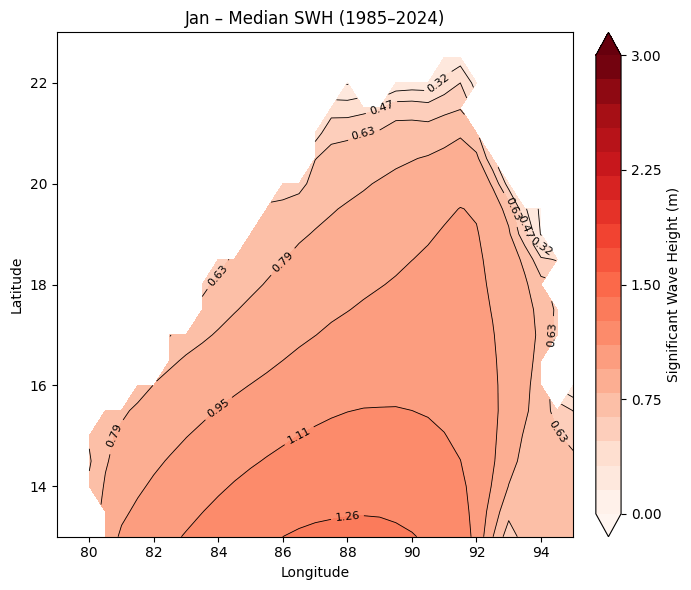

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# -------------------- LOAD DATA --------------------
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

# -------------------- MONTH SETTINGS --------------------
month = 1          # January
month_name = "Jan"

# USE THE SAME RANGE YOU USED BEFORE
vmin = 0
vmax = 3.0         # <-- use your January vmax

levels = np.linspace(vmin, vmax, 20)
ticks = np.linspace(vmin, vmax, 5)

# -------------------- SELECT ALL YEARS OF THIS MONTH --------------------
mask = (time.dt.month == month)
swh_month = swh.where(mask, drop=True)

# -------------------- MEDIAN ACROSS ALL YEARS --------------------
# 1st median over time (daily/hourly)
# 2nd median over years (implicitly handled by time selection)
month_median_all_years = swh_month.median(dim="valid_time")

# -------------------- PLOT --------------------
fig, ax = plt.subplots(figsize=(7,6))

# Filled contours
cf = ax.contourf(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    cmap="Reds",
    vmin=vmin,
    vmax=vmax,
    extend="both"
)

# Contour lines (IMPORTANT PART)
cl = ax.contour(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    colors="black",
    linewidths=0.6
)
ax.clabel(cl, inline=True, fontsize=8, fmt="%.2f")

# Colorbar (DO NOT CHANGE)
cbar = fig.colorbar(
    cf,
    ax=ax,
    orientation="vertical",
    fraction=0.046,
    pad=0.04
)
cbar.set_label("Significant Wave Height (m)")
cbar.set_ticks(ticks)
cbar.ax.set_ylim(vmin, vmax)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"{month_name} – Median SWH (1985–2024)")

plt.tight_layout()
plt.show()


Mounted at /content/drive


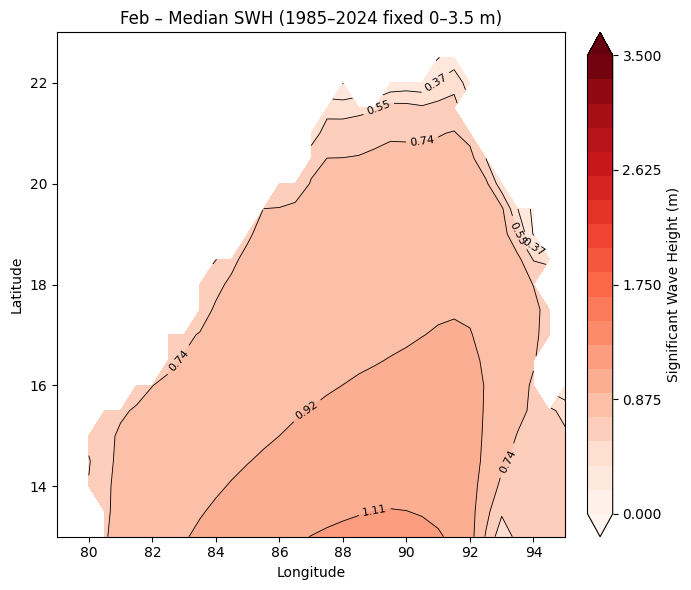

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# -------------------- LOAD DATA --------------------
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

# -------------------- MONTH SETTINGS --------------------
month = 2               # February
month_name = "Feb"

# SAME RANGE YOU USED BEFORE FOR FEB
vmin = 0
vmax = 3.5              # ← safety margin so nothing clips

levels = np.linspace(vmin, vmax, 20)
ticks  = np.linspace(vmin, vmax, 5)

# -------------------- SELECT ALL YEARS OF THIS MONTH --------------------
mask = (time.dt.month == month)
swh_month = swh.where(mask, drop=True)

# -------------------- MEDIAN ACROSS ALL YEARS + ALL TIME STEPS --------------------
month_median_all_years = swh_month.median(dim="valid_time")

# -------------------- PLOT --------------------
fig, ax = plt.subplots(figsize=(7,6))

# filled contour
cf = ax.contourf(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    cmap="Reds",
    vmin=vmin,
    vmax=vmax,
    extend="both"
)

# contour lines (black)
cl = ax.contour(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    colors="black",
    linewidths=0.6
)
ax.clabel(cl, inline=True, fontsize=8, fmt="%.2f")

# colorbar (fixed range + fixed ticks)
cbar = fig.colorbar(
    cf,
    ax=ax,
    orientation="vertical",
    fraction=0.046,
    pad=0.04
)
cbar.set_label("Significant Wave Height (m)")
cbar.set_ticks(ticks)
cbar.ax.set_ylim(vmin, vmax)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"{month_name} – Median SWH (1985–2024 fixed {vmin}–{vmax} m)")

plt.tight_layout()
plt.show()


Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x79cfbd1259e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


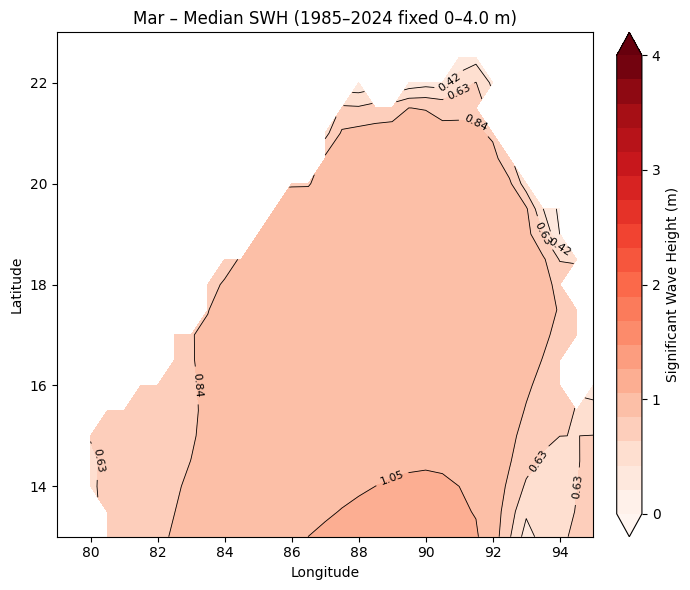

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# -------------------- LOAD DATA --------------------
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

# -------------------- MONTH SETTINGS --------------------
month = 3
month_name = "Mar"

# FIX RANGE SAME AS BEFORE (late winter to transition season)
vmin = 0
vmax = 4.0

levels = np.linspace(vmin, vmax, 20)
ticks  = np.linspace(vmin, vmax, 5)

# -------------------- SELECT ALL YEARS FOR MARCH --------------------
mask = (time.dt.month == month)
swh_month = swh.where(mask, drop=True)

# -------------------- MEDIAN ACROSS ALL YEARS + ALL TIME STEPS --------------------
month_median_all_years = swh_month.median(dim="valid_time")

# -------------------- PLOT MEDIAN WITH CONTOURS --------------------
fig, ax = plt.subplots(figsize=(7,6))

cf = ax.contourf(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    cmap="Reds",
    vmin=vmin,
    vmax=vmax,
    extend="both"
)

cl = ax.contour(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    colors="black",
    linewidths=0.6
)
ax.clabel(cl, inline=True, fontsize=8, fmt="%.2f")

cbar = fig.colorbar(
    cf,
    ax=ax,
    orientation="vertical",
    fraction=0.046,
    pad=0.04
)
cbar.set_label("Significant Wave Height (m)")
cbar.set_ticks(ticks)
cbar.ax.set_ylim(vmin, vmax)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"{month_name} – Median SWH (1985–2024 fixed {vmin}–{vmax} m)")

plt.tight_layout()
plt.show()



Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x79cfbd1259e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


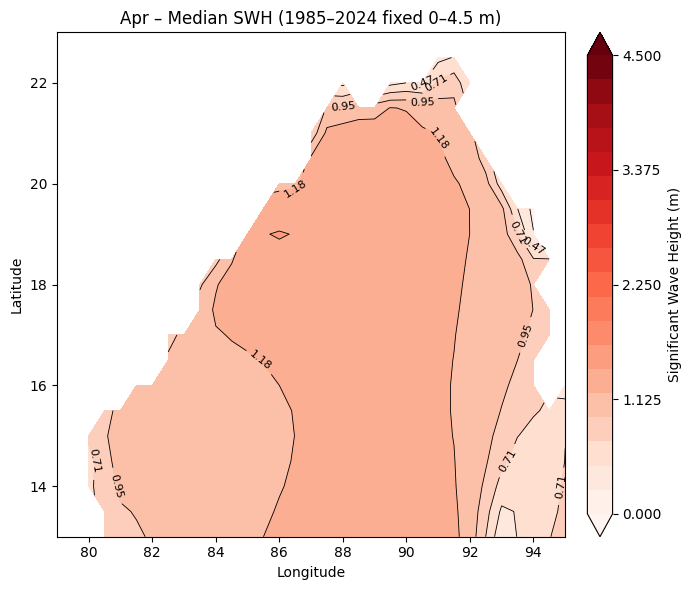

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# -------------------- LOAD DATA --------------------
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

# -------------------- MONTH SETTINGS --------------------
month = 4
month_name = "Apr"

# FIX RANGE SAME AS TRAINING PLOTS
vmin = 0
vmax = 4.5

levels = np.linspace(vmin, vmax, 20)
ticks  = np.linspace(vmin, vmax, 5)

# -------------------- SELECT ALL YEARS FOR APRIL --------------------
mask = (time.dt.month == month)
swh_month = swh.where(mask, drop=True)

# -------------------- MEDIAN ACROSS ALL YEARS + ALL TIME STEPS --------------------
month_median_all_years = swh_month.median(dim="valid_time")

# -------------------- PLOT --------------------
fig, ax = plt.subplots(figsize=(7,6))

# filled contour
cf = ax.contourf(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    cmap="Reds",
    vmin=vmin,
    vmax=vmax,
    extend="both"
)

# contour lines
cl = ax.contour(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    colors="black",
    linewidths=0.6
)
ax.clabel(cl, inline=True, fontsize=8, fmt="%.2f")

# colorbar — fixed + consistent
cbar = fig.colorbar(
    cf,
    ax=ax,
    orientation="vertical",
    fraction=0.046,
    pad=0.04
)
cbar.set_label("Significant Wave Height (m)")
cbar.set_ticks(ticks)
cbar.ax.set_ylim(vmin, vmax)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"{month_name} – Median SWH (1985–2024 fixed {vmin}–{vmax} m)")

plt.tight_layout()
plt.show()


Mounted at /content/drive


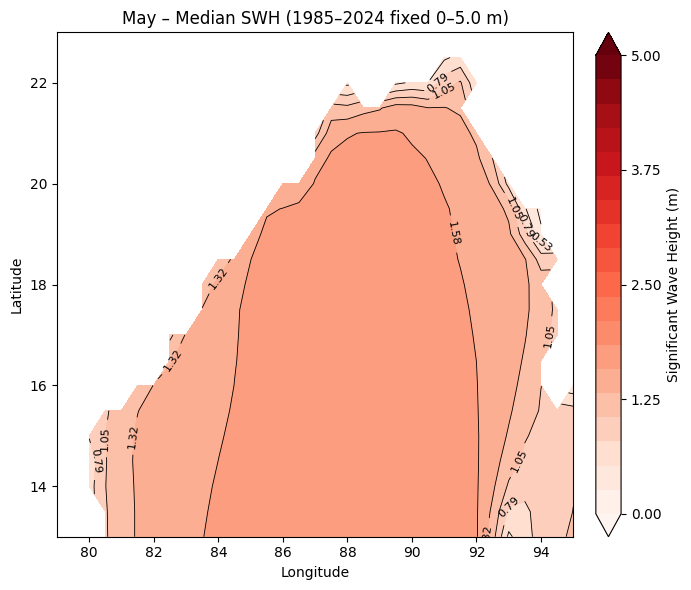

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# -------------------- LOAD DATA --------------------
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

# -------------------- MONTH SETTINGS --------------------
month = 5
month_name = "May"

# FIX RANGE SAME AS TRAINING PLOTS
vmin = 0
vmax = 5.0

levels = np.linspace(vmin, vmax, 20)
ticks  = np.linspace(vmin, vmax, 5)

# -------------------- SELECT ALL YEARS FOR MAY --------------------
mask = (time.dt.month == month)
swh_month = swh.where(mask, drop=True)

# -------------------- MEDIAN ACROSS ALL YEARS --------------------
month_median_all_years = swh_month.median(dim="valid_time")

# -------------------- PLOT --------------------
fig, ax = plt.subplots(figsize=(7,6))

# filled contour
cf = ax.contourf(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    cmap="Reds",
    vmin=vmin,
    vmax=vmax,
    extend="both"
)

# contour lines
cl = ax.contour(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    colors="black",
    linewidths=0.6
)
ax.clabel(cl, inline=True, fontsize=8, fmt="%.2f")

# colorbar — fixed + consistent
cbar = fig.colorbar(
    cf,
    ax=ax,
    orientation="vertical",
    fraction=0.046,
    pad=0.04
)
cbar.set_label("Significant Wave Height (m)")
cbar.set_ticks(ticks)
cbar.ax.set_ylim(vmin, vmax)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"{month_name} – Median SWH (1985–2024 fixed {vmin}–{vmax} m)")

plt.tight_layout()
plt.show()


Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x79cfbd1259e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


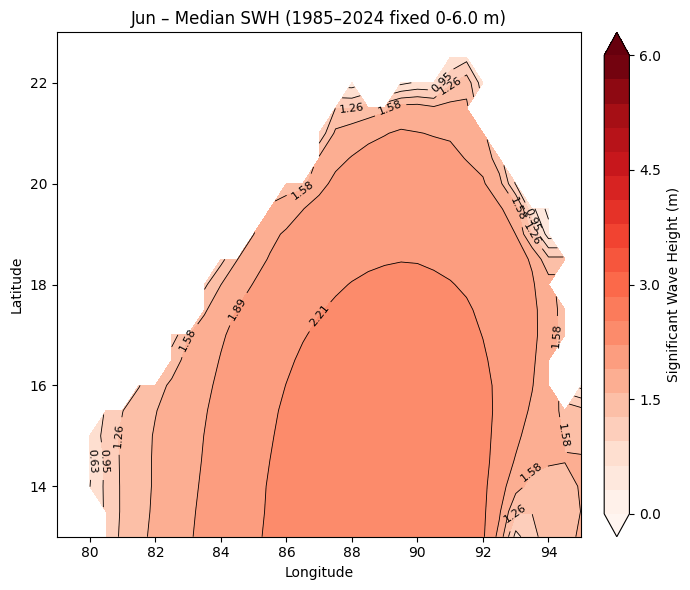

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# -------------------- LOAD DATA --------------------
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

# -------------------- MONTH SETTINGS --------------------
month = 6
month_name = "Jun"

# FIX RANGE SAME AS EARLIER MONTH PLOTS
vmin = 0
vmax = 6.0

levels = np.linspace(vmin, vmax, 20)
ticks  = np.linspace(vmin, vmax, 5)

# -------------------- SELECT ALL YEARS FOR JUNE --------------------
mask = (time.dt.month == month)
swh_month = swh.where(mask, drop=True)

# -------------------- MEDIAN ACROSS ALL YEARS --------------------
month_median_all_years = swh_month.median(dim="valid_time")

# -------------------- PLOT --------------------
fig, ax = plt.subplots(figsize=(7,6))

# filled contour
cf = ax.contourf(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    cmap="Reds",
    vmin=vmin,
    vmax=vmax,
    extend="both"
)

# contour lines
cl = ax.contour(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    colors="black",
    linewidths=0.6
)
ax.clabel(cl, inline=True, fontsize=8, fmt="%.2f")

# colorbar — fixed + consistent
cbar = fig.colorbar(
    cf,
    ax=ax,
    orientation="vertical",
    fraction=0.046,
    pad=0.04
)
cbar.set_label("Significant Wave Height (m)")
cbar.set_ticks(ticks)
cbar.ax.set_ylim(vmin, vmax)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"{month_name} – Median SWH (1985–2024 fixed {vmin}-{vmax} m)")

plt.tight_layout()
plt.show()


Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x79cfbd1259e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


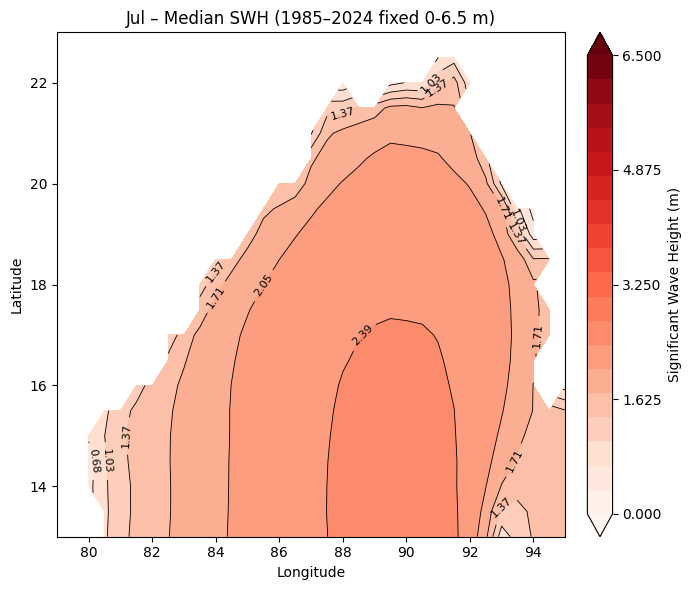

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# -------------------- LOAD DATA --------------------
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

# -------------------- MONTH SETTINGS --------------------
month = 7
month_name = "Jul"

# FIXED SAFE RANGE (same logic as before)
vmin = 0
vmax = 6.5

levels = np.linspace(vmin, vmax, 20)
ticks  = np.linspace(vmin, vmax, 5)

# -------------------- SELECT ALL YEARS FOR JULY --------------------
mask = (time.dt.month == month)
swh_month = swh.where(mask, drop=True)

# -------------------- MEDIAN ACROSS ALL YEARS --------------------
month_median_all_years = swh_month.median(dim="valid_time")

# -------------------- PLOT --------------------
fig, ax = plt.subplots(figsize=(7,6))

cf = ax.contourf(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    cmap="Reds",
    vmin=vmin,
    vmax=vmax,
    extend="both"
)

cl = ax.contour(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    colors="black",
    linewidths=0.6
)
ax.clabel(cl, inline=True, fontsize=8, fmt="%.2f")

cbar = fig.colorbar(
    cf,
    ax=ax,
    orientation="vertical",
    fraction=0.046,
    pad=0.04
)
cbar.set_label("Significant Wave Height (m)")
cbar.set_ticks(ticks)
cbar.ax.set_ylim(vmin, vmax)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"{month_name} – Median SWH (1985–2024 fixed {vmin}-{vmax} m)")

plt.tight_layout()
plt.show()


Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x79cfbd1259e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


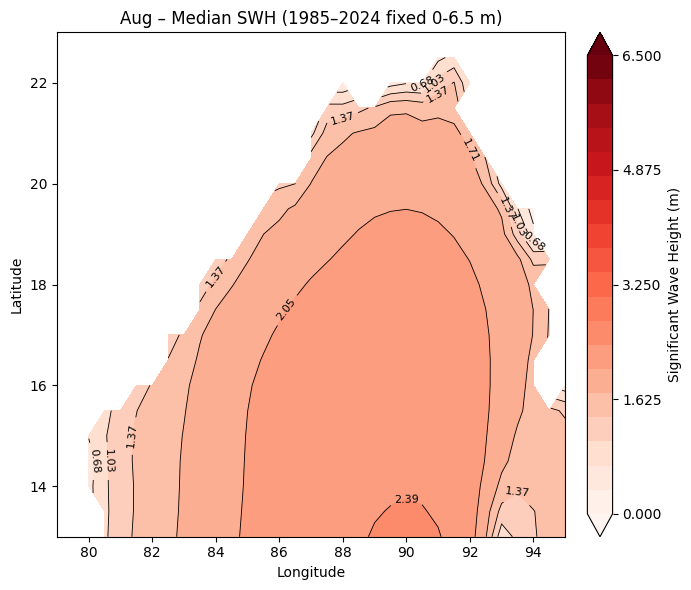

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# -------------------- LOAD DATA --------------------
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

# -------------------- MONTH SETTINGS --------------------
month = 8
month_name = "Aug"

# FIXED SAFE RANGE FOR AUGUST
vmin = 0
vmax = 6.5

levels = np.linspace(vmin, vmax, 20)
ticks  = np.linspace(vmin, vmax, 5)

# -------------------- SELECT ALL YEARS FOR AUGUST --------------------
mask = (time.dt.month == month)
swh_month = swh.where(mask, drop=True)

# -------------------- MEDIAN ACROSS ALL YEARS --------------------
month_median_all_years = swh_month.median(dim="valid_time")

# -------------------- PLOT --------------------
fig, ax = plt.subplots(figsize=(7,6))

cf = ax.contourf(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    cmap="Reds",
    vmin=vmin,
    vmax=vmax,
    extend="both"
)

cl = ax.contour(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    colors="black",
    linewidths=0.6
)
ax.clabel(cl, inline=True, fontsize=8, fmt="%.2f")

cbar = fig.colorbar(
    cf,
    ax=ax,
    orientation="vertical",
    fraction=0.046,
    pad=0.04
)
cbar.set_label("Significant Wave Height (m)")
cbar.set_ticks(ticks)
cbar.ax.set_ylim(vmin, vmax)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"{month_name} – Median SWH (1985–2024 fixed {vmin}-{vmax} m)")

plt.tight_layout()
plt.show()


Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x79cfbd1259e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


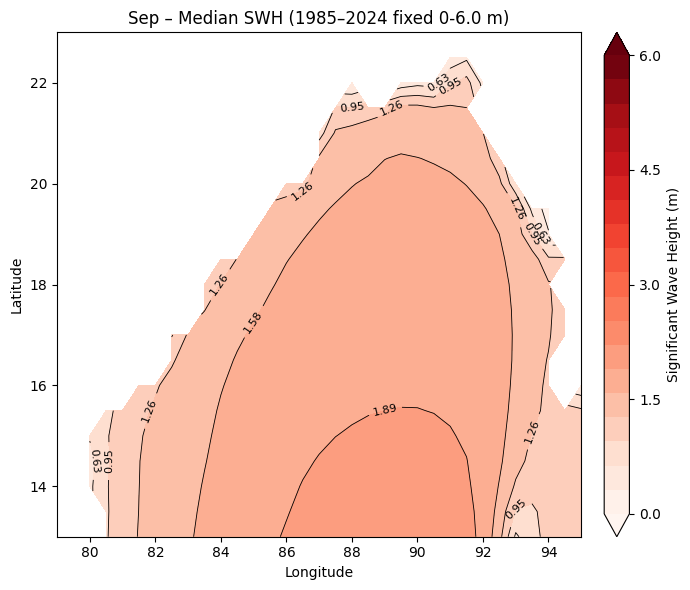

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# -------------------- LOAD DATA --------------------
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

# -------------------- MONTH SETTINGS --------------------
month = 9
month_name = "Sep"

# FIXED RANGE SAFE FOR SEPTEMBER
vmin = 0
vmax = 6.0

levels = np.linspace(vmin, vmax, 20)
ticks  = np.linspace(vmin, vmax, 5)

# -------------------- SELECT ALL YEARS FOR SEPTEMBER --------------------
mask = (time.dt.month == month)
swh_month = swh.where(mask, drop=True)

# -------------------- MEDIAN ACROSS ALL YEARS --------------------
month_median_all_years = swh_month.median(dim="valid_time")

# -------------------- PLOT --------------------
fig, ax = plt.subplots(figsize=(7,6))

cf = ax.contourf(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    cmap="Reds",
    vmin=vmin,
    vmax=vmax,
    extend="both"
)

cl = ax.contour(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    colors="black",
    linewidths=0.6
)
ax.clabel(cl, inline=True, fontsize=8, fmt="%.2f")

cbar = fig.colorbar(
    cf,
    ax=ax,
    orientation="vertical",
    fraction=0.046,
    pad=0.04
)
cbar.set_label("Significant Wave Height (m)")
cbar.set_ticks(ticks)
cbar.ax.set_ylim(vmin, vmax)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"{month_name} – Median SWH (1985–2024 fixed {vmin}-{vmax} m)")

plt.tight_layout()
plt.show()


Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x79cfbd1259e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


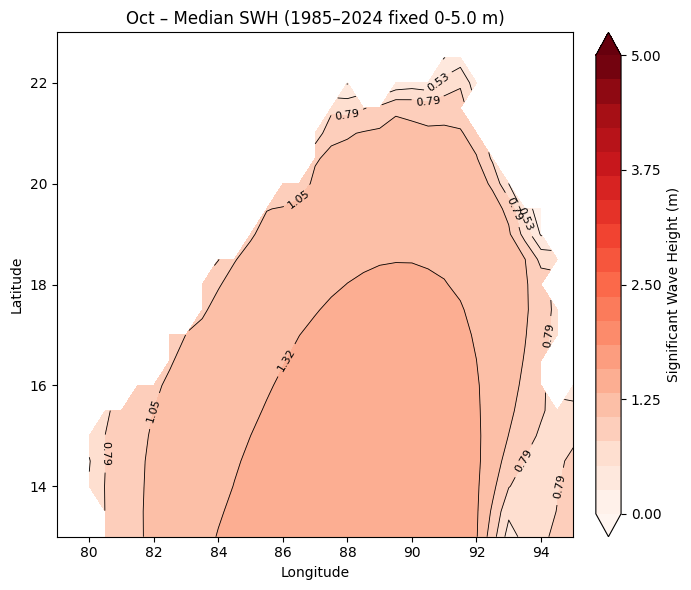

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# -------------------- LOAD DATA --------------------
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

# -------------------- MONTH SETTINGS --------------------
month = 10
month_name = "Oct"

# FIXED RANGE SAFE FOR OCTOBER (monsoon retreat)
vmin = 0
vmax = 5.0

levels = np.linspace(vmin, vmax, 20)
ticks  = np.linspace(vmin, vmax, 5)

# -------------------- SELECT ALL YEARS FOR OCTOBER --------------------
mask = (time.dt.month == month)
swh_month = swh.where(mask, drop=True)

# -------------------- MEDIAN ACROSS ALL YEARS --------------------
month_median_all_years = swh_month.median(dim="valid_time")

# -------------------- PLOT --------------------
fig, ax = plt.subplots(figsize=(7,6))

cf = ax.contourf(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    cmap="Reds",
    vmin=vmin,
    vmax=vmax,
    extend="both"
)

cl = ax.contour(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    colors="black",
    linewidths=0.6
)
ax.clabel(cl, inline=True, fontsize=8, fmt="%.2f")

cbar = fig.colorbar(
    cf,
    ax=ax,
    orientation="vertical",
    fraction=0.046,
    pad=0.04
)
cbar.set_label("Significant Wave Height (m)")
cbar.set_ticks(ticks)
cbar.ax.set_ylim(vmin, vmax)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"{month_name} – Median SWH (1985–2024 fixed {vmin}-{vmax} m)")

plt.tight_layout()
plt.show()


Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x79cfbd1259e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


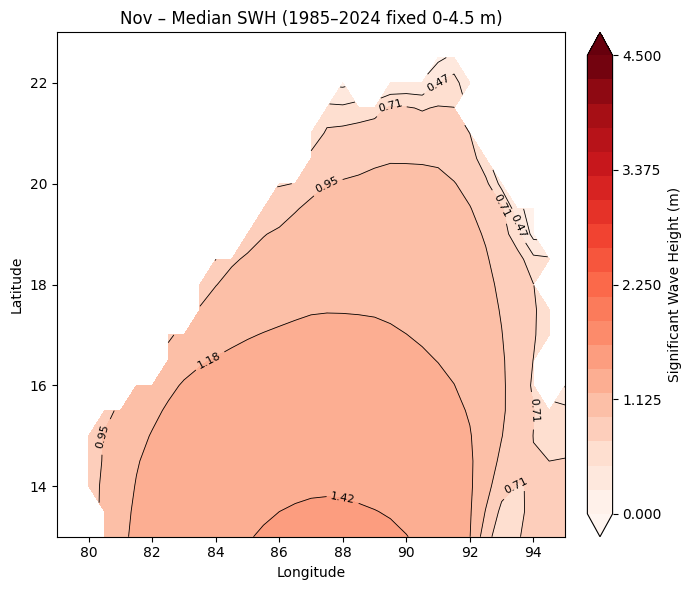

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# -------------------- LOAD DATA --------------------
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

# -------------------- MONTH SETTINGS --------------------
month = 11
month_name = "Nov"

# FIXED SAFE RANGE FOR NOVEMBER
vmin = 0
vmax = 4.5

levels = np.linspace(vmin, vmax, 20)
ticks  = np.linspace(vmin, vmax, 5)

# -------------------- SELECT ALL YEARS FOR NOVEMBER --------------------
mask = (time.dt.month == month)
swh_month = swh.where(mask, drop=True)

# -------------------- MEDIAN ACROSS ALL YEARS --------------------
month_median_all_years = swh_month.median(dim="valid_time")

# -------------------- PLOT --------------------
fig, ax = plt.subplots(figsize=(7,6))

cf = ax.contourf(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    cmap="Reds",
    vmin=vmin,
    vmax=vmax,
    extend="both"
)

cl = ax.contour(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    colors="black",
    linewidths=0.6
)
ax.clabel(cl, inline=True, fontsize=8, fmt="%.2f")

cbar = fig.colorbar(
    cf,
    ax=ax,
    orientation="vertical",
    fraction=0.046,
    pad=0.04
)
cbar.set_label("Significant Wave Height (m)")
cbar.set_ticks(ticks)
cbar.ax.set_ylim(vmin, vmax)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"{month_name} – Median SWH (1985–2024 fixed {vmin}-{vmax} m)")

plt.tight_layout()
plt.show()


Mounted at /content/drive


Exception ignored in: <function CachingFileManager.__del__ at 0x79cfbd1259e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 258, in __del__
    self.close(needs_lock=False)
  File "/usr/local/lib/python3.12/dist-packages/xarray/backends/file_manager.py", line 242, in close
    file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5netcdf/core.py", line 1846, in close
    self._h5file.close()
  File "/usr/local/lib/python3.12/dist-packages/h5py/_hl/files.py", line 632, in close
    self.id._close_open_objects(h5f.OBJ_LOCAL | h5f.OBJ_FILE)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 357, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


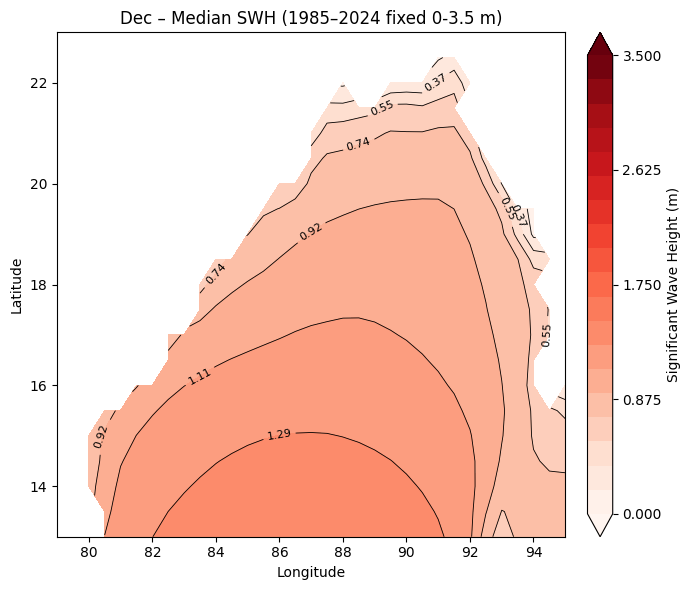

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# -------------------- LOAD DATA --------------------
file_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(file_path)

swh = ds["swh"]
time = ds["valid_time"]
lats = ds["latitude"].values
lons = ds["longitude"].values

# -------------------- MONTH SETTINGS --------------------
month = 12
month_name = "Dec"

# FIXED SAFE RANGE FOR DECEMBER (calmest month)
vmin = 0
vmax = 3.5

levels = np.linspace(vmin, vmax, 20)
ticks  = np.linspace(vmin, vmax, 5)

# -------------------- SELECT ALL YEARS FOR DECEMBER --------------------
mask = (time.dt.month == month)
swh_month = swh.where(mask, drop=True)

# -------------------- MEDIAN ACROSS ALL YEARS --------------------
month_median_all_years = swh_month.median(dim="valid_time")

# -------------------- PLOT --------------------
fig, ax = plt.subplots(figsize=(7,6))

cf = ax.contourf(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    cmap="Reds",
    vmin=vmin,
    vmax=vmax,
    extend="both"
)

cl = ax.contour(
    lons,
    lats,
    month_median_all_years,
    levels=levels,
    colors="black",
    linewidths=0.6
)
ax.clabel(cl, inline=True, fontsize=8, fmt="%.2f")

cbar = fig.colorbar(
    cf,
    ax=ax,
    orientation="vertical",
    fraction=0.046,
    pad=0.04
)
cbar.set_label("Significant Wave Height (m)")
cbar.set_ticks(ticks)
cbar.ax.set_ylim(vmin, vmax)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"{month_name} – Median SWH (1985–2024 fixed {vmin}-{vmax} m)")

plt.tight_layout()
plt.show()


Mounted at /content/drive


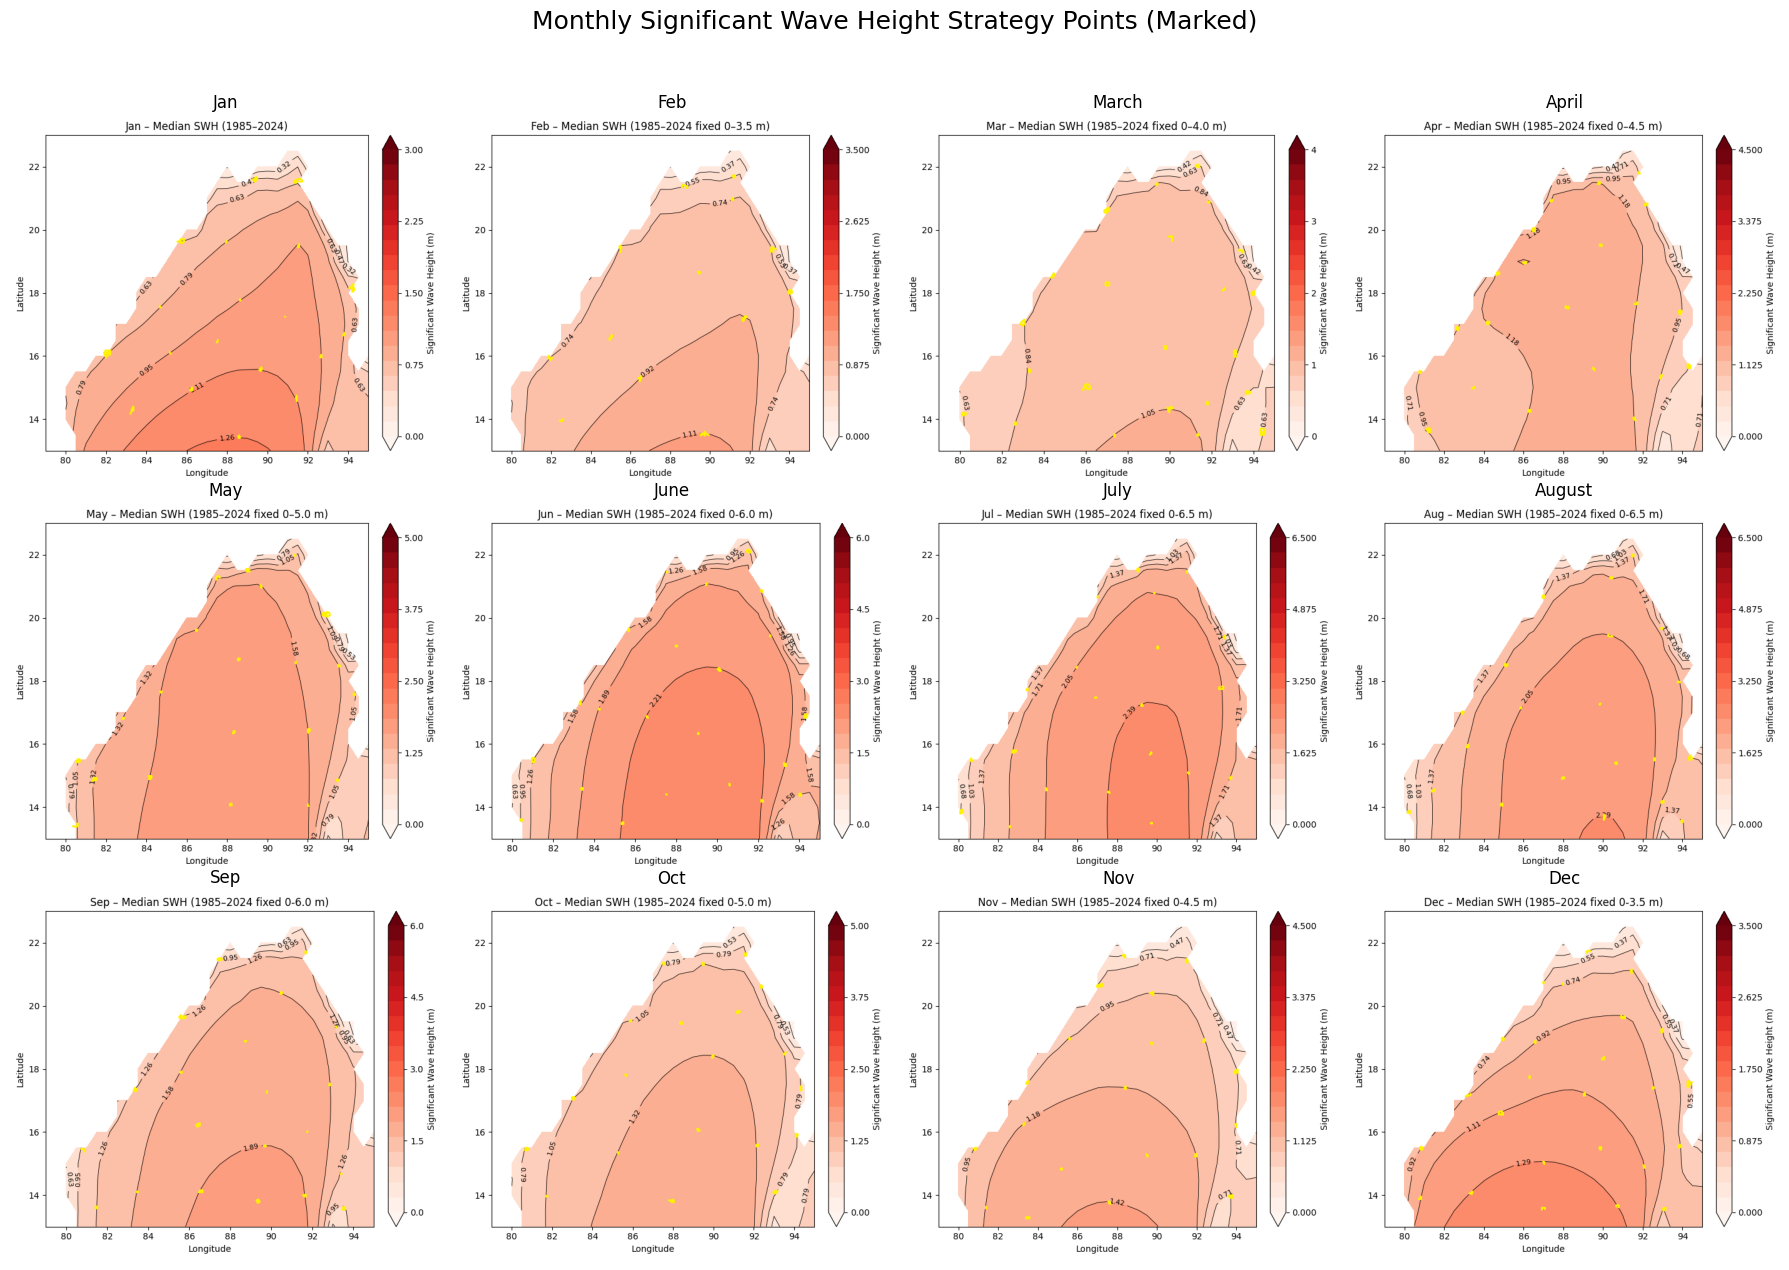

In [ ]:
# ==== 3×4 subplot of marked monthly contour plots ====

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# folder path containing 12 marked monthly images
folder = "/content/drive/MyDrive/Wave_Monthly_Plots/monthly plots marked"

# ordered list of image filenames
files = [
    "jan plot.png",
    "feb plot.png",
    "march plot.png",
    "april plot.png",
    "may plot.png",
    "june plot.png",
    "july plot.png",
    "august plot.png",
    "sep plot.png",
    "oct plot.png",
    "nov plot.png",
    "dec plot.png"
]

# create subplot grid
fig, axes = plt.subplots(3, 4, figsize=(18, 13))
fig.suptitle("Monthly Significant Wave Height Strategy Points (Marked)", fontsize=18)

for ax, fname in zip(axes.flat, files):
    img_path = os.path.join(folder, fname)
    img = mpimg.imread(img_path)

    ax.imshow(img)
    ax.set_title(fname.split()[0].capitalize(), fontsize=12)
    ax.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

folder = "/content/drive/MyDrive/Wave_Monthly_Plots/monthly plots marked"

files = [
    "jan plot.png",
    "feb plot.png",
    "march plot.png",
    "april plot.png",
    "may plot.png",
    "june plot.png",
    "july plot.png",
    "august plot.png",
    "sep plot.png",
    "oct plot.png",
    "nov plot.png",
    "dec plot.png"
]

# read first image for shape
base = mpimg.imread(os.path.join(folder, files[0])).astype(float)

# create an accumulation image
acc = np.zeros_like(base)

for f in files:
    img = mpimg.imread(os.path.join(folder, f)).astype(float)

    # normalize pixel intensities
    img = img / img.max()

    # accumulate pixels
    acc += img

# normalize accumulated image to keep visible
acc = acc / acc.max()

plt.figure(figsize=(8,6))
plt.imshow(acc)
plt.title("Combined Overlay of All Monthly Marked Points")
plt.axis("off")
plt.show()


Mounted at /content/drive


ValueError: operands could not be broadcast together with shapes (590,691,4) (590,690,4) (590,691,4) 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# folder where the CSVs exist
folder = "coordinates/"   # change path if needed

# get CSV paths
csv_files = glob.glob(os.path.join(folder, "*.csv"))
print("Found", len(csv_files), "files")

all_points = []

# load each csv
for f in csv_files:
    try:
        df = pd.read_csv(f)              # try with header
        if df.shape[1] >= 2:
            x = df.iloc[:,0]
            y = df.iloc[:,1]
        else:
            raise ValueError
    except:
        df = pd.read_csv(f, header=None) # load without header
        x = df.iloc[:,0]
        y = df.iloc[:,1]

    temp = pd.DataFrame({"x": x, "y": y, "file": os.path.basename(f)})
    all_points.append(temp)

# combine all CSVs
data = pd.concat(all_points, ignore_index=True)

# snap to nearest 0.5 grid
data["x_snap"] = (data["x"] / 0.5).round() * 0.5
data["y_snap"] = (data["y"] / 0.5).round() * 0.5

print("Total points:", len(data))

# scatter plot
plt.figure(figsize=(8,6))
plt.scatter(data["x_snap"], data["y_snap"], s=12)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Snapped Monthly Wave Points (0.5 grid)")
plt.grid(True)
plt.show()

# save final merged file
data.to_csv("merged_snapped_points.csv", index=False)
print("Saved merged_snapped_points.csv")


Found 0 files


ValueError: No objects to concatenate

In [9]:
from google.colab import drive
drive.mount('/content/drive')

import os

for root, dirs, files in os.walk("/content/drive/MyDrive"):
    print(root)
    break   # print only top folder


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [10]:
for root, dirs, files in os.walk("/content/drive/MyDrive"):
    print(root)
    # stop when it finds your coordinates folder
    if "coordinates" in root.lower():
        break


/content/drive/MyDrive
/content/drive/MyDrive/Classroom
/content/drive/MyDrive/Classroom/X F
/content/drive/MyDrive/Classroom/IT & AIML
/content/drive/MyDrive/Classroom/AIML ODD21
/content/drive/MyDrive/Classroom/IC151G INDIAN CONSTITUTION
/content/drive/MyDrive/Classroom/AI & ML 1st Year
/content/drive/MyDrive/Classroom/AI ML All
/content/drive/MyDrive/Classroom/Computer Workshop 1
/content/drive/MyDrive/Classroom/AIML 1
/content/drive/MyDrive/Classroom/Artificial Intelligence and Machine Learning First Year Even 2021
/content/drive/MyDrive/Classroom/AIML FY B2022 First Year
/content/drive/MyDrive/Classroom/IT101E Basics of Programming practical lab 1st yr AIML (II SEM)
/content/drive/MyDrive/Classroom/AIML Even 21
/content/drive/MyDrive/Classroom/AIML
/content/drive/MyDrive/Classroom/AIML 2nd year 2022
/content/drive/MyDrive/Classroom/WP Python 2nd yr AIML
/content/drive/MyDrive/Classroom/INNOVATION JUNCTION --
/content/drive/MyDrive/Classroom/Imaginate AI 📝✨🔮
/content/drive/MyDrive/

Found 12 files
Total points extracted: 238


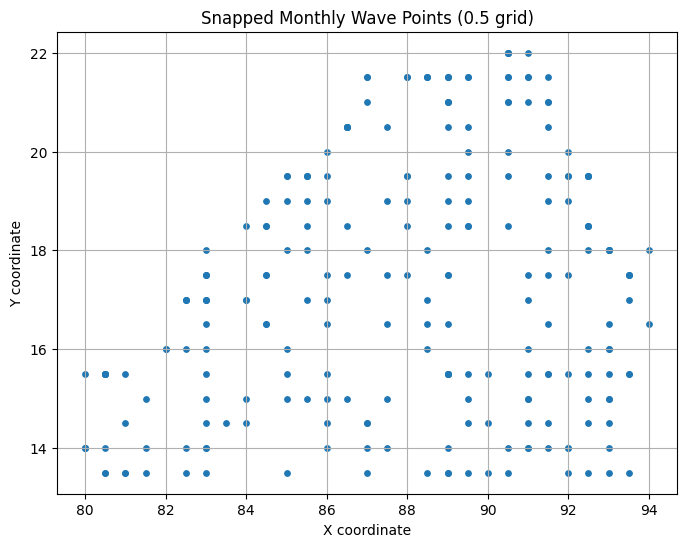

OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive/Wave_Monthly_Pots'

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# folder path from your drive listing
folder = "/content/drive/MyDrive/Wave_Monthly_Plots/coordinates"

# find all CSV files
csv_files = glob.glob(folder + "/*.csv")
print("Found", len(csv_files), "files")

all_points = []

for f in csv_files:
    try:
        df = pd.read_csv(f)              # try reading with header
        if df.shape[1] < 2:
            raise ValueError("Not enough columns")
        x = df.iloc[:, 0]
        y = df.iloc[:, 1]
    except:
        # read without header
        df = pd.read_csv(f, header=None)
        x = df.iloc[:, 0]
        y = df.iloc[:, 1]

    temp = pd.DataFrame({"x": x, "y": y, "file": os.path.basename(f)})
    all_points.append(temp)

# concatenate all dataframes
data = pd.concat(all_points, ignore_index=True)
print("Total points extracted:", len(data))

# nearest neighbour snapping to 0.5 grid
data["x_snap"] = (data["x"] / 0.5).round() * 0.5
data["y_snap"] = (data["y"] / 0.5).round() * 0.5

# scatter plot the snapped points
plt.figure(figsize=(8,6))
plt.scatter(data["x_snap"], data["y_snap"], s=15)
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("Snapped Monthly Wave Points (0.5 grid)")
plt.grid(True)
plt.show()

# save merged and snapped coordinates
output_path = "/content/drive/MyDrive/Wave_Monthly_Pots/merged_snapped_points.csv"
data.to_csv(output_path, index=False)
print("Saved:", output_path)


In [12]:
import pandas as pd
import numpy as np
import glob
import os
import plotly.express as px

# path to folder in Drive
folder = "/content/drive/MyDrive/Wave_Monthly_Plots/coordinates"

# collect CSV file paths
csv_files = glob.glob(folder + "/*.csv")
print("Found:", len(csv_files), "files")

all_points = []

# load and combine CSVs
for f in csv_files:
    try:
        df = pd.read_csv(f)
        if df.shape[1] < 2:
            raise ValueError("Insufficient columns")
        x = df.iloc[:, 0]
        y = df.iloc[:, 1]
    except:
        df = pd.read_csv(f, header=None)
        x = df.iloc[:, 0]
        y = df.iloc[:, 1]

    temp = pd.DataFrame({
        "x": x,
        "y": y,
        "source_file": os.path.basename(f)
    })

    all_points.append(temp)

data = pd.concat(all_points, ignore_index=True)

print("Total points extracted:", len(data))

# nearest neighbour snapping to 0.5
data["x_snap"] = (data["x"] / 0.5).round() * 0.5
data["y_snap"] = (data["y"] / 0.5).round() * 0.5

# interactive scatter plot
fig = px.scatter(
    data,
    x="x_snap",
    y="y_snap",
    hover_data=["source_file", "x_snap", "y_snap"],
    title="Snapped Wave Points (0.5 grid)",
)

fig.update_traces(marker=dict(size=6))
fig.update_xaxes(title="X coord")
fig.update_yaxes(title="Y coord")
fig.show()


Found: 12 files
Total points extracted: 238


In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
import glob
import os

# path to coordinates folder in your Drive
folder = "/content/drive/MyDrive/Wave_Monthly_Plots/coordinates"

# find CSV files inside folder
csv_files = glob.glob(folder + "/*.csv")
print("Found:", len(csv_files), "files")

all_points = []

# load all CSVs
for f in csv_files:
    try:
        df = pd.read_csv(f)
        if df.shape[1] < 2:
            raise ValueError
        x = df.iloc[:, 0]
        y = df.iloc[:, 1]
    except:
        df = pd.read_csv(f, header=None)
        x = df.iloc[:, 0]
        y = df.iloc[:, 1]

    temp = pd.DataFrame({
        "x": x,
        "y": y,
        "source_file": os.path.basename(f)
    })

    all_points.append(temp)

# merge all
data = pd.concat(all_points, ignore_index=True)
print("Total points extracted:", len(data))

# nearest neighbour snapping to 0.5 grid
data["x_snap"] = (data["x"] / 0.5).round() * 0.5
data["y_snap"] = (data["y"] / 0.5).round() * 0.5

# interactive scatter plot
fig = px.scatter(
    data,
    x="x_snap",
    y="y_snap",
    hover_data=["source_file","x_snap","y_snap"],
    title="Snapped Wave Points (0.5° nearest neighbour grid)",
)

fig.update_traces(marker=dict(size=6))

# shrink x axis / enforce square aspect ratio
fig.update_yaxes(scaleanchor="x", scaleratio=1)

# optionally pad slightly
xmin, xmax = data["x_snap"].min(), data["x_snap"].max()
ymin, ymax = data["y_snap"].min(), data["y_snap"].max()

fig.update_xaxes(range=[xmin-0.2, xmax+0.2], dtick=0.5)
fig.update_yaxes(range=[ymin-0.2, ymax+0.2], dtick=0.5)

# square figure
fig.update_layout(
    width=700,
    height=700,
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
)

fig.show()

# save merged data if needed
output_path = "/content/drive/MyDrive/Wave_Monthly_Plots/merged_snapped_points.csv"
data.to_csv(output_path, index=False)
print("Saved:", output_path)


Found: 12 files
Total points extracted: 238


Saved: /content/drive/MyDrive/Wave_Monthly_Plots/merged_snapped_points.csv


In [14]:
from sklearn.cluster import KMeans
import numpy as np

# convert snapped coords into array
X = data[["x_snap", "y_snap"]].to_numpy()

# choose number of clusters (change k later)
k = 8

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# labels for each point
data["cluster"] = kmeans.labels_

# centroid coordinates
centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)

# convert centroids to dataframe
centroid_df = pd.DataFrame(centroids, columns=["centroid_x","centroid_y"])
centroid_df["cluster_id"] = centroid_df.index

centroid_df


Centroids:
[[91.28571429 20.60714286]
 [84.48684211 17.93421053]
 [90.62162162 14.47297297]
 [81.48484848 14.65151515]
 [88.58333333 18.125     ]
 [85.94736842 14.76315789]
 [92.72727273 16.81818182]
 [88.05769231 21.        ]]


,centroid_x,centroid_y,cluster_id
0,91.285714,20.607143,0
1,84.486842,17.934211,1
2,90.621622,14.472973,2
3,81.484848,14.651515,3
4,88.583333,18.125000,4
5,85.947368,14.763158,5
6,92.727273,16.818182,6
7,88.057692,21.000000,7


In [9]:
import plotly.express as px

fig = px.scatter(
    data,
    x="x_snap",
    y="y_snap",
    color="cluster",
    hover_data=["x_snap","y_snap","cluster"],
    title=f"K-Means Cluster Points (k={k})"
)

fig.add_scatter(
    x=centroid_df["centroid_x"],
    y=centroid_df["centroid_y"],
    mode="markers+text",
    text=["C"+str(i) for i in centroid_df["cluster_id"]],
    marker=dict(size=12, symbol="x"),
    name="Centroids"
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_layout(width=700, height=700)
fig.show()


In [13]:
from sklearn.cluster import KMeans
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# use snapped coordinates for clustering
X = data[["x_snap", "y_snap"]].to_numpy()

# choose large k for precise local coverage
k = 50   # change to more/less clusters if needed

kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans.fit(X)

# assign cluster IDs
data["cluster"] = kmeans.labels_

# extract centroids
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=["centroid_x","centroid_y"])
centroid_df["cluster_id"] = centroid_df.index

print("Centroids:", len(centroid_df))

# ---- PLOTTING ----

# plot clustered points
fig = px.scatter(
    data,
    x="x_snap",
    y="y_snap",
    color="cluster",
    hover_data=["x_snap","y_snap","cluster"],
    title=f"K-Means Clustering (k={k}) with centroids"
)

# add centroid marker points
fig.add_trace(
    go.Scatter(
        x=centroid_df["centroid_x"],
        y=centroid_df["centroid_y"],
        mode="markers+text",
        text=["C"+str(i) for i in centroid_df["cluster_id"]],
        name="Centroids",
        marker=dict(size=12, symbol="x")
    )
)

# enforce equal axis scale + square
fig.update_yaxes(scaleanchor="x", scaleratio=1)

fig.update_layout(
    width=750,
    height=750,
    xaxis=dict(showgrid=True, dtick=0.5),
    yaxis=dict(showgrid=True, dtick=0.5),
)

fig.show()


Centroids: 50


In [14]:
# centroid dataframe already created earlier:
# centroid_df has columns: centroid_x, centroid_y

centroids_latlon = centroid_df.rename(
    columns={"centroid_y": "lat", "centroid_x": "lon"}
)[["lat","lon","cluster_id"]]

print(centroids_latlon)


          lat        lon  cluster_id
0   20.250000  91.750000           0
1   17.000000  85.875000           1
2   13.812500  89.312500           2
3   16.928571  82.785714           3
4   15.062500  93.000000           4
5   21.500000  88.300000           5
6   14.666667  83.833333           6
7   17.625000  88.625000           7
8   14.000000  80.125000           8
9   19.400000  85.500000           9
10  18.187500  92.750000          10
11  21.187500  91.062500          11
12  14.071429  91.000000          12
13  14.625000  86.125000          13
14  15.437500  89.250000          14
15  16.250000  91.250000          15
16  15.500000  80.500000          16
17  19.400000  89.300000          17
18  13.916667  82.833333          18
19  20.500000  86.666667          19
20  17.875000  86.875000          20
21  13.625000  93.000000          21
22  14.250000  87.166667          22
23  19.333333  90.500000          23
24  17.500000  93.600000          24
25  18.625000  84.375000          25
2

In [15]:
import plotly.express as px

fig = px.scatter(
    centroids_latlon,
    x="lon",
    y="lat",
    hover_data=["lat","lon","cluster_id"],
    title="Centroid Positions"
)

fig.update_traces(marker=dict(size=12, symbol="x"))
fig.update_yaxes(scaleanchor="x", scaleratio=1)

fig.update_layout(
    width=700,
    height=700,
    xaxis=dict(showgrid=True, dtick=0.5),
    yaxis=dict(showgrid=True, dtick=0.5),
)

fig.show()


In [15]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd

# wave_data dataframe must have columns x and y
wave_points = wave_data[["x","y"]].to_numpy()

# centroid dataframe from clustering step
cent_points = centroid_df[["centroid_x","centroid_y"]].to_numpy()

# configure nearest neighbour search
nbrs = NearestNeighbors(n_neighbors=1).fit(wave_points)

distances, indices = nbrs.kneighbors(cent_points)

# extract mapped wave points
nearest_wave_points = wave_points[indices[:,0]]

# build final dataframe
mapped_centroids = pd.DataFrame({
    "centroid_x": cent_points[:,0],
    "centroid_y": cent_points[:,1],
    "mapped_x": nearest_wave_points[:,0],
    "mapped_y": nearest_wave_points[:,1],
    "distance_error": distances[:,0],
})


NameError: name 'wave_data' is not defined

In [17]:
pip install xarray netCDF4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.6 MB/s eta 0:00:00


In [16]:
import xarray as xr

# path to any one .nc file in your drive
nc_path = ("/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc")

ds = xr.open_dataset(nc_path)

# extract coordinate arrays (name may vary: lat/longitude or latitude/longitude)
lat = ds["latitude"].values
lon = ds["longitude"].values


In [20]:
print(ds)


<xarray.Dataset> Size: 4GB
Dimensions:     (valid_time: 350640, latitude: 21, longitude: 33)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 3MB 1984-11-01 ... 2024-10-31T23:...
  * latitude    (latitude) float64 168B 23.0 22.5 22.0 21.5 ... 14.0 13.5 13.0
  * longitude   (longitude) float64 264B 79.0 79.5 80.0 80.5 ... 94.0 94.5 95.0
    number      int64 8B ...
    expver      (valid_time) <U4 6MB ...
Data variables:
    mwd         (valid_time, latitude, longitude) float32 972MB ...
    swh         (valid_time, latitude, longitude) float32 972MB ...
    pp1d        (valid_time, latitude, longitude) float32 972MB ...
    wdw         (valid_time, latitude, longitude) float32 972MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:           

In [21]:
import numpy as np

lat_grid, lon_grid = np.meshgrid(lat, lon, indexing="ij")

grid_points = np.column_stack((lon_grid.ravel(), lat_grid.ravel()))


In [22]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=1).fit(grid_points)


In [23]:
cent_points = centroid_df[["centroid_x","centroid_y"]].to_numpy()

distances, indices = nbrs.kneighbors(cent_points)

nearest_grid_nodes = grid_points[indices[:,0]]


In [17]:
mapped_df = pd.DataFrame({
    "centroid_lon": cent_points[:,0],
    "centroid_lat": cent_points[:,1],
    "mapped_lon": nearest_grid_nodes[:,0],
    "mapped_lat": nearest_grid_nodes[:,1],
    "grid_dist_deg": distances[:,0],
})


NameError: name 'cent_points' is not defined

In [25]:
import plotly.graph_objects as go

fig = go.Figure()

# centroid requested points
fig.add_scatter(
    x=mapped_df["centroid_lon"],
    y=mapped_df["centroid_lat"],
    mode="markers",
    marker=dict(size=10, symbol="x"),
    name="Centroids"
)

# mapped real dataset grid points
fig.add_scatter(
    x=mapped_df["mapped_lon"],
    y=mapped_df["mapped_lat"],
    mode="markers",
    name="Mapped dataset coords",
    marker=dict(size=6)
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_layout(width=700, height=700, title="Centroids mapped to nearest wave grid")
fig.show()


In [18]:
upper_data = data[data["y_snap"] >= 17].copy()

print("Original points:", len(data))
print("Filtered points:", len(upper_data))


Original points: 238
Filtered points: 127


In [19]:
upper_data.to_csv("/content/drive/MyDrive/Wave_Monthly_Plots/snapped_points_upper_half.csv", index=False)
print("Saved filtered points file")


Saved filtered points file


In [20]:
import plotly.express as px

fig = px.scatter(
    upper_data,
    x="x_snap",
    y="y_snap",
    hover_data=["x_snap","y_snap"],
    title="Upper Half Wave Points (≥17° lat)"
)

fig.update_traces(marker=dict(size=6))
fig.update_yaxes(scaleanchor="x", scaleratio=1)

fig.update_layout(
    width=700,
    height=700,
    xaxis=dict(showgrid=True, dtick=0.5),
    yaxis=dict(showgrid=True, dtick=0.5),
)

fig.show()


In [21]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# make sure upper_data exists from previous step
X = upper_data[["x_snap","y_snap"]].to_numpy()

# choose number of clusters
k = 25

kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans.fit(X)

# assign each point a cluster ID
upper_data["cluster"] = kmeans.labels_

# compute centroids
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(
    centroids,
    columns=["centroid_lon","centroid_lat"]
)
centroid_df["cluster_id"] = centroid_df.index

print("Cluster centroids:")
print(centroid_df)


Cluster centroids:
    centroid_lon  centroid_lat  cluster_id
0      89.125000     21.312500           0
1      85.500000     19.400000           1
2      92.750000     18.187500           2
3      84.250000     17.250000           3
4      87.900000     19.100000           4
5      91.285714     21.142857           5
6      91.400000     17.500000           6
7      92.285714     19.571429           7
8      87.000000     21.333333           8
9      89.375000     18.625000           9
10     87.500000     17.666667          10
11     82.850000     17.250000          11
12     90.555556     21.666667          12
13     86.000000     17.250000          13
14     84.375000     18.625000          14
15     85.333333     18.166667          15
16     90.500000     19.333333          16
17     89.333333     20.333333          17
18     93.600000     17.500000          18
19     86.666667     20.500000          19
20     88.750000     17.500000          20
21     89.166667     19.333333     

In [22]:
centroid_df.to_csv(
    "/content/drive/MyDrive/Wave_Monthly_Plots/centroids_upper_25.csv",
    index=False
)
print("Saved centroids to drive")


Saved centroids to drive


In [23]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(
    upper_data,
    x="x_snap",
    y="y_snap",
    color="cluster",
    hover_data=["x_snap","y_snap","cluster"],
    title=f"K-Means clustering of upper region (k={k})"
)

# centroid markers
fig.add_trace(go.Scatter(
    x=centroid_df["centroid_lon"],
    y=centroid_df["centroid_lat"],
    mode="markers+text",
    marker=dict(size=10, symbol="x"),
    text=["C"+str(i) for i in centroid_df["cluster_id"]],
    name="Centroids"
))

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_layout(width=700, height=700)
fig.show()


In [4]:
import xarray as xr
import numpy as np

# pick any one .nc file from your wave dataset folder
nc_path = ("/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc")

ds = xr.open_dataset(nc_path)

lat = ds["latitude"].values      # adjust name if different
lon = ds["longitude"].values     # adjust name if different

# create 2D grid coordinate pairs
lat_grid, lon_grid = np.meshgrid(lat, lon, indexing="ij")

wave_grid_points = np.column_stack((lon_grid.ravel(), lat_grid.ravel()))


In [5]:
print(ds)


<xarray.Dataset> Size: 4GB
Dimensions:     (valid_time: 350640, latitude: 21, longitude: 33)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 3MB 1984-11-01 ... 2024-10-31T23:...
  * latitude    (latitude) float64 168B 23.0 22.5 22.0 21.5 ... 14.0 13.5 13.0
  * longitude   (longitude) float64 264B 79.0 79.5 80.0 80.5 ... 94.0 94.5 95.0
    number      int64 8B ...
    expver      (valid_time) <U4 6MB ...
Data variables:
    mwd         (valid_time, latitude, longitude) float32 972MB ...
    swh         (valid_time, latitude, longitude) float32 972MB ...
    pp1d        (valid_time, latitude, longitude) float32 972MB ...
    wdw         (valid_time, latitude, longitude) float32 972MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:           

In [7]:
upper_data = data[data["y_snap"] >= 17].copy()



NameError: name 'data' is not defined

In [9]:
import pandas as pd
import numpy as np
import glob
import os

folder = "/content/drive/MyDrive/Wave_Monthly_Plots/coordinates"

csv_files = glob.glob(folder + "/*.csv")
print("Found:", len(csv_files), "files")

all_points = []

for f in csv_files:
    try:
        df = pd.read_csv(f)
        if df.shape[1] < 2:
            raise ValueError
        x = df.iloc[:,0]
        y = df.iloc[:,1]
    except:
        df = pd.read_csv(f, header=None)
        x = df.iloc[:,0]
        y = df.iloc[:,1]

    temp = pd.DataFrame({"x": x, "y": y})
    all_points.append(temp)

data = pd.concat(all_points, ignore_index=True)

# snap to nearest 0.5
data["x_snap"] = (data["x"]/0.5).round()*0.5
data["y_snap"] = (data["y"]/0.5).round()*0.5

print("Loaded and snapped:", len(data), "points")


Found: 12 files
Loaded and snapped: 238 points


In [10]:
upper_data = data[data["y_snap"] >= 17].copy()
print("Upper half points:", len(upper_data))


Upper half points: 127


In [11]:
from sklearn.cluster import KMeans

X = upper_data[["x_snap","y_snap"]].to_numpy()

k = 25

kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans.fit(X)

upper_data["cluster"] = kmeans.labels_

centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(
    centroids,
    columns=["centroid_lon","centroid_lat"]
)
centroid_df["cluster_id"] = centroid_df.index


In [12]:
from sklearn.neighbors import NearestNeighbors

# using wave_grid_points loaded earlier from NetCDF grid
cent_points = centroid_df[["centroid_lon","centroid_lat"]].to_numpy()

nbrs = NearestNeighbors(n_neighbors=1).fit(wave_grid_points)

distances, indices = nbrs.kneighbors(cent_points)

matched_grid_coords = wave_grid_points[indices[:,0]]

mapped_centroids = pd.DataFrame({
    "centroid_lon": cent_points[:,0],
    "centroid_lat": cent_points[:,1],
    "grid_lon": matched_grid_coords[:,0],
    "grid_lat": matched_grid_coords[:,1],
    "grid_dist_deg": distances[:,0],
    "cluster_id": centroid_df["cluster_id"]
})

mapped_centroids


,centroid_lon,centroid_lat,grid_lon,grid_lat,grid_dist_deg,cluster_id
0,89.125000,21.312500,89.0,21.5,0.225347,0
1,85.500000,19.400000,85.5,19.5,0.100000,1
2,92.750000,18.187500,92.5,18.0,0.312500,2
3,84.250000,17.250000,84.0,17.0,0.353553,3
4,87.900000,19.100000,88.0,19.0,0.141421,4
5,91.285714,21.142857,91.5,21.0,0.257539,5
6,91.400000,17.500000,91.5,17.5,0.100000,6
7,92.285714,19.571429,92.5,19.5,0.225877,7
8,87.000000,21.333333,87.0,21.5,0.166667,8
9,89.375000,18.625000,89.5,18.5,0.176777,9


In [13]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# centroid coords as Nx2 array
cent_points = centroid_df[["centroid_lon", "centroid_lat"]].to_numpy()

# build nearest neighbor model
nbrs = NearestNeighbors(n_neighbors=1).fit(wave_grid_points)

distances, indices = nbrs.kneighbors(cent_points)

# fetch nearest grid points
matched_grid_coords = wave_grid_points[indices[:,0]]

# build final dataframe
mapped_centroids = pd.DataFrame({
    "centroid_lon": cent_points[:,0],
    "centroid_lat": cent_points[:,1],
    "grid_lon": matched_grid_coords[:,0],
    "grid_lat": matched_grid_coords[:,1],
    "distance_error_deg": distances[:,0],
    "cluster_id": centroid_df["cluster_id"]
})

print(mapped_centroids)


    centroid_lon  centroid_lat  grid_lon  grid_lat  distance_error_deg  \
0      89.125000     21.312500      89.0      21.5            0.225347   
1      85.500000     19.400000      85.5      19.5            0.100000   
2      92.750000     18.187500      92.5      18.0            0.312500   
3      84.250000     17.250000      84.0      17.0            0.353553   
4      87.900000     19.100000      88.0      19.0            0.141421   
5      91.285714     21.142857      91.5      21.0            0.257539   
6      91.400000     17.500000      91.5      17.5            0.100000   
7      92.285714     19.571429      92.5      19.5            0.225877   
8      87.000000     21.333333      87.0      21.5            0.166667   
9      89.375000     18.625000      89.5      18.5            0.176777   
10     87.500000     17.666667      87.5      17.5            0.166667   
11     82.850000     17.250000      83.0      17.5            0.291548   
12     90.555556     21.666667      90

In [14]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(
    upper_data,
    x="x_snap",
    y="y_snap",
    color="cluster",
    hover_data=["x_snap","y_snap","cluster"],
    title=f"K-Means clustering of selected region (k={len(centroid_df)})",
)

# add centroid markers
fig.add_trace(
    go.Scatter(
        x=centroid_df["centroid_lon"],
        y=centroid_df["centroid_lat"],
        mode="markers+text",
        marker=dict(size=12, symbol="x"),
        text=[f"C{i}" for i in centroid_df["cluster_id"]],
        textposition="top center",
        name="Centroids"
    )
)

# enforce square appearance
fig.update_yaxes(scaleanchor="x", scaleratio=1)

fig.update_layout(
    width=750,
    height=750,
    xaxis=dict(showgrid=True, dtick=0.5),
    yaxis=dict(showgrid=True, dtick=0.5),
)

fig.show()


In [15]:
xmin = centroid_df["centroid_lon"].min()
xmax = centroid_df["centroid_lon"].max()
ymin = centroid_df["centroid_lat"].min()
ymax = centroid_df["centroid_lat"].max()

print(xmin, xmax, ymin, ymax)


82.85 93.6 17.25 21.666666666666668


In [16]:
inner_centroids = centroid_df[
    (centroid_df["centroid_lon"] > xmin) &
    (centroid_df["centroid_lon"] < xmax) &
    (centroid_df["centroid_lat"] > ymin) &
    (centroid_df["centroid_lat"] < ymax)
].copy()

print("Original centroids:", len(centroid_df))
print("Inner centroids kept:", len(inner_centroids))


Original centroids: 25
Inner centroids kept: 20


In [17]:
from sklearn.neighbors import NearestNeighbors

# using wave_grid_points loaded earlier from NetCDF grid
cent_points = centroid_df[["centroid_lon","centroid_lat"]].to_numpy()

nbrs = NearestNeighbors(n_neighbors=1).fit(wave_grid_points)

distances, indices = nbrs.kneighbors(cent_points)

matched_grid_coords = wave_grid_points[indices[:,0]]

mapped_centroids = pd.DataFrame({
    "centroid_lon": cent_points[:,0],
    "centroid_lat": cent_points[:,1],
    "grid_lon": matched_grid_coords[:,0],
    "grid_lat": matched_grid_coords[:,1],
    "grid_dist_deg": distances[:,0],
    "cluster_id": centroid_df["cluster_id"]
})

mapped_centroids


,centroid_lon,centroid_lat,grid_lon,grid_lat,grid_dist_deg,cluster_id
0,89.125000,21.312500,89.0,21.5,0.225347,0
1,85.500000,19.400000,85.5,19.5,0.100000,1
2,92.750000,18.187500,92.5,18.0,0.312500,2
3,84.250000,17.250000,84.0,17.0,0.353553,3
4,87.900000,19.100000,88.0,19.0,0.141421,4
5,91.285714,21.142857,91.5,21.0,0.257539,5
6,91.400000,17.500000,91.5,17.5,0.100000,6
7,92.285714,19.571429,92.5,19.5,0.225877,7
8,87.000000,21.333333,87.0,21.5,0.166667,8
9,89.375000,18.625000,89.5,18.5,0.176777,9


In [18]:
import plotly.graph_objects as go

fig = go.Figure()

# centroid points (orange X markers)
fig.add_trace(go.Scatter(
    x=mapped_centroids["centroid_lon"],
    y=mapped_centroids["centroid_lat"],
    mode="markers",
    marker=dict(symbol="x", size=12),
    name="Centroid (computed)"
))

# nearest dataset grid coords (blue circles)
fig.add_trace(go.Scatter(
    x=mapped_centroids["grid_lon"],
    y=mapped_centroids["grid_lat"],
    mode="markers",
    marker=dict(size=8),
    name="Nearest real grid point"
))

# optional: draw lines to show the NN mapping
for _, row in mapped_centroids.iterrows():
    fig.add_trace(go.Scatter(
        x=[row["centroid_lon"], row["grid_lon"]],
        y=[row["centroid_lat"], row["grid_lat"]],
        mode="lines",
        line=dict(width=1),
        showlegend=False
    ))

fig.update_yaxes(scaleanchor="x", scaleratio=1)

fig.update_layout(
    width=750,
    height=750,
    title="Centroids mapped to nearest dataset grid points",
    xaxis=dict(title="Longitude"),
    yaxis=dict(title="Latitude")
)

fig.show()


In [19]:
remove_nn_ids = [11,3,13,10,20,6,18,2,7,5,12,0,23,8,19,1,14]


In [20]:
filtered_mapped = mapped_centroids.drop(remove_nn_ids).reset_index(drop=True)

print("Original mapped points:", len(mapped_centroids))
print("Remaining mapped points:", len(filtered_mapped))


Original mapped points: 25
Remaining mapped points: 8


In [21]:
import plotly.graph_objects as go

fig = go.Figure()

# remaining centroids
fig.add_trace(go.Scatter(
    x=filtered_mapped["centroid_lon"],
    y=filtered_mapped["centroid_lat"],
    mode="markers",
    marker=dict(size=10, symbol="x"),
    name="remaining centroids"
))

# remaining wave grid nodes
fig.add_trace(go.Scatter(
    x=filtered_mapped["grid_lon"],
    y=filtered_mapped["grid_lat"],
    mode="markers",
    marker=dict(size=8),
    name="mapped grid points"
))

# optional: draw connecting lines
for _, row in filtered_mapped.iterrows():
    fig.add_trace(go.Scatter(
        x=[row["centroid_lon"], row["grid_lon"]],
        y=[row["centroid_lat"], row["grid_lat"]],
        mode="lines",
        line=dict(width=1),
        showlegend=False
    ))

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_layout(width=750, height=750, title="Filtered nearest-neighbour mapped points")
fig.show()


In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')


nc_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(nc_path)

print(ds)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<xarray.Dataset> Size: 4GB
Dimensions:     (valid_time: 350640, latitude: 21, longitude: 33)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 3MB 1984-11-01 ... 2024-10-31T23:...
  * latitude    (latitude) float64 168B 23.0 22.5 22.0 21.5 ... 14.0 13.5 13.0
  * longitude   (longitude) float64 264B 79.0 79.5 80.0 80.5 ... 94.0 94.5 95.0
    number      int64 8B ...
    expver      (valid_time) <U4 6MB ...
Data variables:
    mwd         (valid_time, latitude, longitude) float32 972MB ...
    swh         (valid_time, latitude, longitude) float32 972MB ...
    pp1d        (valid_time, latitude, longitude) float32 972MB ...
    wdw         (valid_time, latitude, longitude) float32 972MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conven

In [12]:
# make sure this line exists ABOVE
wave_var = "swh"

sample_field = ds[wave_var].isel(time=0).values

# land = 1, ocean = 0
land_mask = np.isnan(sample_field) | (sample_field == 0)
land_mask = land_mask.astype(np.float32)

print("Land mask created:", land_mask.shape)


ValueError: Dimensions {'time'} do not exist. Expected one or more of ('valid_time', 'latitude', 'longitude')

In [20]:
import xarray as xr

nc_path = "/content/drive/MyDrive/wave_height_pred/Concatenated_Wave_Data_Bay_of_Bengal.nc"
ds = xr.open_dataset(nc_path)

print(ds)


<xarray.Dataset> Size: 4GB
Dimensions:     (valid_time: 350640, latitude: 21, longitude: 33)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 3MB 1984-11-01 ... 2024-10-31T23:...
  * latitude    (latitude) float64 168B 23.0 22.5 22.0 21.5 ... 14.0 13.5 13.0
  * longitude   (longitude) float64 264B 79.0 79.5 80.0 80.5 ... 94.0 94.5 95.0
    number      int64 8B ...
    expver      (valid_time) <U4 6MB ...
Data variables:
    mwd         (valid_time, latitude, longitude) float32 972MB ...
    swh         (valid_time, latitude, longitude) float32 972MB ...
    pp1d        (valid_time, latitude, longitude) float32 972MB ...
    wdw         (valid_time, latitude, longitude) float32 972MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:           

In [19]:
import numpy as np

wave_var = "swh"

lat = ds["latitude"].values
lon = ds["longitude"].values
time = ds["valid_time"].values

print("lat shape:", lat.shape)
print("lon shape:", lon.shape)
print("time length:", len(time))


lat shape: (21,)
lon shape: (33,)
time length: 350640


In [21]:
lat_mask = lat >= 17.0
lat_idx = np.where(lat_mask)[0]

H = len(lat_idx)
W = len(lon)

print("Grid size (H, W):", H, W)


Grid size (H, W): 13 33


In [22]:
sample_field = ds[wave_var].isel(valid_time=0).values

land_full = np.isnan(sample_field) | (sample_field == 0)
land_mask = land_full[lat_idx, :].astype(np.float32)

print("Land mask shape:", land_mask.shape)


Land mask shape: (13, 33)


In [23]:
centroid_indices = []

for _, row in filtered_mapped.iterrows():
    i = np.where(lat == row["grid_lat"])[0][0]
    j = np.where(lon == row["grid_lon"])[0][0]
    if i in lat_idx:
        centroid_indices.append((i, j))

print("Centroids used:", len(centroid_indices))


NameError: name 'filtered_mapped' is not defined

In [24]:
import os

for root, dirs, files in os.walk("/content/drive/MyDrive"):
    for f in files:
        if "centroid" in f.lower():
            print(os.path.join(root, f))


/content/drive/MyDrive/Wave_Monthly_Plots/centroids_upper_25.csv


In [25]:
import pandas as pd

centroid_df = pd.read_csv(
    "/content/drive/MyDrive/Wave_Monthly_Plots/centroids_upper_25.csv"
)

print(centroid_df.head())
print(centroid_df.columns)
print("Total centroids:", len(centroid_df))


   centroid_lon  centroid_lat  cluster_id
0        89.125       21.3125           0
1        85.500       19.4000           1
2        92.750       18.1875           2
3        84.250       17.2500           3
4        87.900       19.1000           4
Index(['centroid_lon', 'centroid_lat', 'cluster_id'], dtype='object')
Total centroids: 25


In [26]:
centroid_df = centroid_df.rename(columns={
    "lat": "grid_lat",
    "lon": "grid_lon"
})


In [27]:
centroid_df = centroid_df.rename(columns={
    "latitude": "grid_lat",
    "longitude": "grid_lon"
})


In [28]:
print(centroid_df.columns)


Index(['centroid_lon', 'centroid_lat', 'cluster_id'], dtype='object')


In [29]:
sample_field = ds[wave_var].isel(valid_time=0).values

land_full = np.isnan(sample_field) | (sample_field == 0)
land_mask = land_full[lat_idx, :].astype(np.float32)

print("Land mask shape:", land_mask.shape)


Land mask shape: (13, 33)


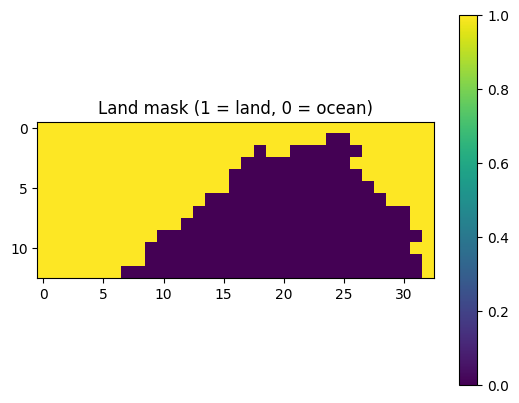

In [18]:
plt.imshow(land_mask)
plt.title("Land mask (1 = land, 0 = ocean)")
plt.colorbar()
plt.show()


In [30]:
centroid_df = pd.read_csv(
    "/content/drive/MyDrive/Wave_Monthly_Plots/centroids_upper_25.csv"
)

print(centroid_df.head())
print(centroid_df.columns)


   centroid_lon  centroid_lat  cluster_id
0        89.125       21.3125           0
1        85.500       19.4000           1
2        92.750       18.1875           2
3        84.250       17.2500           3
4        87.900       19.1000           4
Index(['centroid_lon', 'centroid_lat', 'cluster_id'], dtype='object')


In [31]:
# build full grid of dataset points
grid_lon, grid_lat = np.meshgrid(lon, lat)
grid_points = np.column_stack([grid_lon.ravel(), grid_lat.ravel()])

from sklearn.neighbors import NearestNeighbors

cent_points = centroid_df[["centroid_lon", "centroid_lat"]].to_numpy()

nbrs = NearestNeighbors(n_neighbors=1).fit(grid_points)
_, indices = nbrs.kneighbors(cent_points)

matched_grid = grid_points[indices[:, 0]]


In [32]:
centroid_indices = []

for lon_c, lat_c in matched_grid:
    i = np.where(lat == lat_c)[0][0]
    j = np.where(lon == lon_c)[0][0]
    if i in lat_idx:   # keep only upper half
        centroid_indices.append((i, j))

print("Number of centroids used:", len(centroid_indices))


Number of centroids used: 25


In [33]:
t = 0  # one time step only

field = ds[wave_var].isel(valid_time=t).values


In [34]:
y = field[lat_idx, :].copy()
y[np.isnan(y)] = 0

print("Target shape:", y.shape)


Target shape: (13, 33)


In [35]:
X = np.zeros((H, W))

for (i, j) in centroid_indices:
    i_upper = np.where(lat_idx == i)[0][0]
    X[i_upper, j] = field[i, j]

# enforce land = 0
X[land_mask == 1] = 0

print("Input shape:", X.shape)


Input shape: (13, 33)


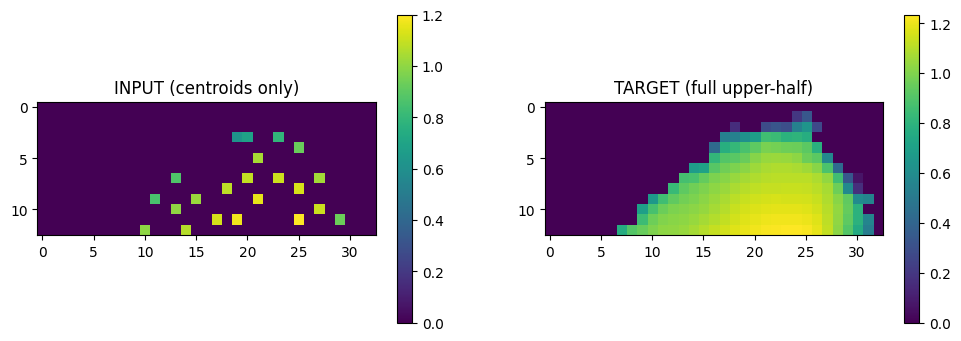

In [36]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title("INPUT (centroids only)")
plt.imshow(X)
plt.colorbar()

plt.subplot(1,2,2)
plt.title("TARGET (full upper-half)")
plt.imshow(y)
plt.colorbar()

plt.show()


In [4]:
                   time = ds["valid_time"].values

print("Total time steps:", len(time))
print("First 5 timestamps:", time[:5])
print("Last 5 timestamps:", time[-5:])


Total time steps: 350640
First 5 timestamps: ['1984-11-01T00:00:00.000000000' '1984-11-01T01:00:00.000000000'
 '1984-11-01T02:00:00.000000000' '1984-11-01T03:00:00.000000000'
 '1984-11-01T04:00:00.000000000']
Last 5 timestamps: ['2024-10-31T19:00:00.000000000' '2024-10-31T20:00:00.000000000'
 '2024-10-31T21:00:00.000000000' '2024-10-31T22:00:00.000000000'
 '2024-10-31T23:00:00.000000000']


In [7]:
X_all = []
y_all = []
time_all = []   # we will store timestamps also


In [11]:
# ---- BASIC SETUP (RUN THIS FIRST) ----

wave_var = "swh"          # wave height variable
time_dim = "valid_time"   # time dimension name
lat_dim  = "latitude"
lon_dim  = "longitude"


In [13]:
lat = ds["latitude"].values
lon = ds["longitude"].values


In [14]:
lat_idx = np.where(lat >= 17.0)[0]

H = len(lat_idx)
W = len(lon)

print("Upper-half grid size:", H, "x", W)


Upper-half grid size: 13 x 33


In [40]:
X_all = []
y_all = []
time_all = []

for t in range(len(time)):   # 👈 THIS LINE WAS MISSING

    # 1. Read wave field for this hour
    field = ds[wave_var].isel(valid_time=t).values

    # 2. TARGET (full upper half)
    y_t = field[lat_idx, :].copy()
    y_t[np.isnan(y_t)] = 0   # land = 0

    # 3. INPUT (sparse)
    X_t = np.zeros((H, W))

    for (i, j) in centroid_indices:
        i_upper = np.where(lat_idx == i)[0][0]
        X_t[i_upper, j] = field[i, j]

    # land forced to 0
    X_t[land_mask == 1] = 0

    # 4. Store
    X_all.append(X_t)
    y_all.append(y_t)
    time_all.append(time[t])

    # progress print (debug)
    if t % 10 == 0:
        print(f"Processed hour {t}")


Processed hour 0
Processed hour 10
Processed hour 20
Processed hour 30
Processed hour 40
Processed hour 50
Processed hour 60
Processed hour 70


KeyboardInterrupt: 

In [41]:
ds                # xarray dataset
time              # ds["valid_time"].values
lat, lon
lat_idx           # indices where lat >= 17
H, W              # upper-half grid size
land_mask         # shape (H, W), 1=land, 0=ocean
centroid_indices  # list of (i, j) grid indices
wave_var = "swh"


In [42]:
import numpy as np
import pandas as pd


In [43]:
time_pd = pd.to_datetime(time)

train_idx = np.where(time_pd.year <= 2023)[0]
test_idx  = np.where(time_pd.year == 2024)[0]

print("Train hours:", len(train_idx))
print("Test hours :", len(test_idx))


Train hours: 343320
Test hours : 7320


In [44]:
def data_generator(indices, batch_size=8):
    """
    Generates (X, y) batches for CNN training
    """
    while True:  # Keras expects infinite generator
        np.random.shuffle(indices)

        for start in range(0, len(indices), batch_size):
            batch_idx = indices[start:start + batch_size]

            X_batch = []
            y_batch = []

            for t in batch_idx:
                # 1. Read wave field
                field = ds[wave_var].isel(valid_time=t).values

                # 2. TARGET (full upper half)
                y_t = field[lat_idx, :].copy()
                y_t[np.isnan(y_t)] = 0

                # 3. INPUT (sparse)
                X_t = np.zeros((H, W), dtype=np.float32)

                for (i, j) in centroid_indices:
                    i_upper = np.where(lat_idx == i)[0][0]
                    X_t[i_upper, j] = field[i, j]

                # land forced to 0
                X_t[land_mask == 1] = 0

                X_batch.append(X_t)
                y_batch.append(y_t)

            # Convert to numpy arrays
            X_batch = np.array(X_batch)[..., np.newaxis]  # (B, H, W, 1)
            y_batch = np.array(y_batch)[..., np.newaxis]

            yield X_batch, y_batch


In [45]:
gen = data_generator(train_idx, batch_size=4)

X_test, y_test = next(gen)

print("X shape:", X_test.shape)
print("y shape:", y_test.shape)


X shape: (4, 13, 33, 1)
y shape: (4, 13, 33, 1)


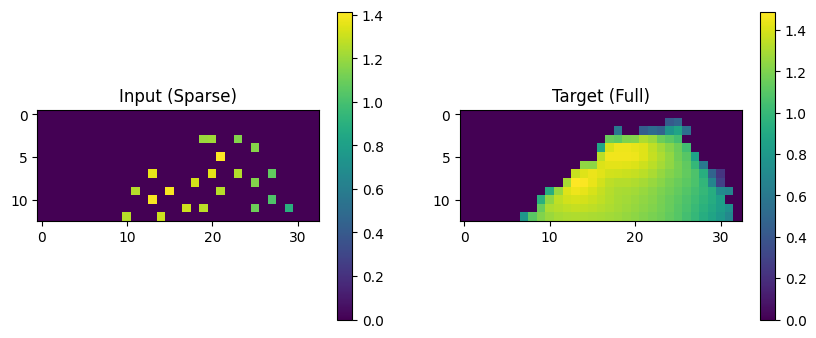

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(X_test[0,:,:,0])
plt.title("Input (Sparse)")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(y_test[0,:,:,0])
plt.title("Target (Full)")
plt.colorbar()

plt.show()


In [50]:
from tensorflow.keras.layers import Input, Conv2D, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [51]:
def build_strong_cnn(H, W):
    inputs = Input(shape=(H, W, 1))

    # Local features
    c1 = Conv2D(64, 3, padding="same", activation="relu")(inputs)
    c1 = Conv2D(64, 3, padding="same", activation="relu")(c1)

    # Medium-scale features (dilated)
    c2 = Conv2D(64, 3, dilation_rate=2, padding="same", activation="relu")(c1)
    c2 = Conv2D(64, 3, dilation_rate=2, padding="same", activation="relu")(c2)

    # Large-scale features (more dilation)
    c3 = Conv2D(64, 3, dilation_rate=4, padding="same", activation="relu")(c2)
    c3 = Conv2D(64, 3, dilation_rate=4, padding="same", activation="relu")(c3)

    # Residual merge (very important)
    merged = Add()([c1, c2, c3])

    # Refinement
    c4 = Conv2D(64, 3, padding="same", activation="relu")(merged)
    c4 = Conv2D(32, 3, padding="same", activation="relu")(c4)

    outputs = Conv2D(1, 1, activation="linear")(c4)

    model = Model(inputs, outputs)
    return model


In [52]:
model = build_strong_cnn(H, W)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="mse"
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 13, 33, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 13, 33,    │        640 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 13, 33,    │     36,928 │ conv2d_8[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 13, 33,    │     36,928 │ conv2d_9[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 13, 33,    │     36,928 │ conv2d_10[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 13, 33,    │     36,928 │ conv2d_11[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 13, 33,    │     36,928 │ conv2d_12[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 13, 33,    │          0 │ conv2d_9[0][0],   │
│                     │ 64)               │            │ conv2d_11[0][0],  │
│                     │                   │            │ conv2d_13[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 13, 33,    │     36,928 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 13, 33,    │     18,464 │ conv2d_14[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 13, 33, 1) │         33 │ conv2d_15[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 240,705 (940.25 KB)

 Trainable params: 240,705 (940.25 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
batch_size = 8

train_gen = data_generator(train_idx, batch_size)
test_gen  = data_generator(test_idx, batch_size)


In [55]:
history = model.fit(
    train_gen,
    steps_per_epoch=100,   # only 100 batches (sanity check)
    epochs=1,              # just 1 epoch
    validation_data=test_gen,
    validation_steps=20
)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1109s 11s/step - loss: 0.4309 - val_loss: 0.0488


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


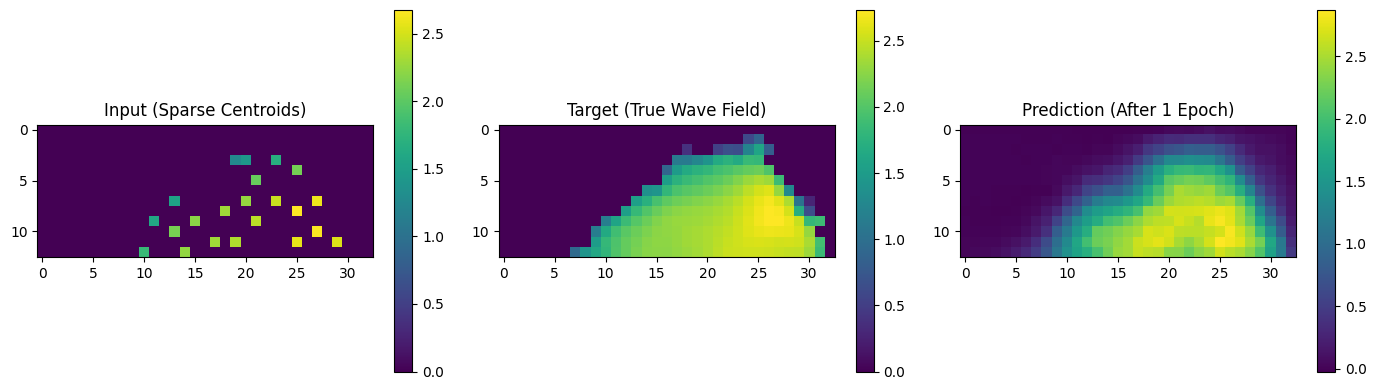

In [56]:
X_vis, y_vis = next(test_gen)
y_pred = model.predict(X_vis)

import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.imshow(X_vis[0,:,:,0])
plt.title("Input (Sparse Centroids)")
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(y_vis[0,:,:,0])
plt.title("Target (True Wave Field)")
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(y_pred[0,:,:,0])
plt.title("Prediction (After 1 Epoch)")
plt.colorbar()

plt.tight_layout()
plt.show()


In [57]:
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_idx)//8,
    epochs=30,
    validation_data=test_gen,
    validation_steps=len(test_idx)//8
)


Epoch 1/30
   75/42915 ━━━━━━━━━━━━━━━━━━━━ 109:27:05 9s/step - loss: 0.0396

KeyboardInterrupt: 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
